In [2]:
import asyncio
import threading
import scripts
import json
import time
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
import sklearn.cluster
import skimage
from skimage import morphology
import argparse
import matplotlib.cm as cm

from GMMDetector import MaterialDetector

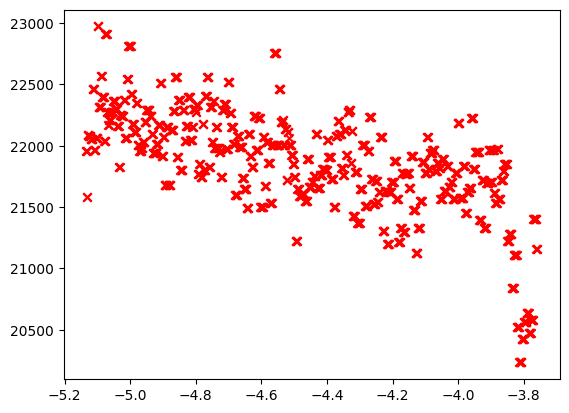

In [7]:
# Create some sample data
# old data
# data = [(-2.6496, 1540), (-2.5996, 1646), (-2.5496, 1540), (-2.4996, 1540), (-2.4495999999999998, 1516), (-2.3996, 1522), (-2.3495999999999997, 1522), (-2.2996, 1548), (-2.2496, 1548), (-2.1995999999999998, 1624), (-2.48762, 0), (-2.53762, 0), (-2.5876200000000003, 0), (-2.63762, 0), (-2.6876200000000003, 0), (-2.73762, 0), (-2.7876200000000004, 0), (-2.8376200000000003, 0), (-2.88762, 0), (-2.9376200000000003, 0), (-2.46112, 0), (-2.51112, 0), (-2.5611200000000003, 0), (-2.61112, 0), (-2.6611200000000004, 0), (-2.71112, 0), (-2.76112, 0), (-2.8111200000000003, 0), (-2.86112, 0), (-2.9111200000000004, 0), (-2.74636, 0), (-2.6963600000000003, 0), (-2.64636, 0), (-2.5963600000000002, 0), (-2.54636, 0), (-2.49636, 0), (-2.4463600000000003, 0), (-2.39636, 0), (-2.3463600000000002, 0), (-2.29636, 0)]
# data = [(-2.47444, 0), (-2.47544, 0), (-2.4764399999999998, 1637), (-2.4774399999999996, 1702), (-2.4784399999999995, 0), (-2.4794399999999994, 0), (-2.4804399999999993, 0), (-2.481439999999999, 0), (-2.482439999999999, 0), (-2.483439999999999, 0), (-2.484439999999999, 0), (-2.4854399999999988, 0), (-2.4864399999999987, 0), (-2.4874399999999985, 0), (-2.4884399999999984, 0), (-2.4894399999999983, 0), (-2.490439999999998, 0), (-2.491439999999998, 0), (-2.492439999999998, 0), (-2.493439999999998, 0), (-2.4944399999999978, 0), (-2.4954399999999977, 0), (-2.4964399999999975, 0), (-2.4974399999999974, 0), (-2.4984399999999973, 0), (-2.499439999999997, 0), (-2.500439999999997, 0), (-2.501439999999997, 0), (-2.502439999999997, 0), (-2.503439999999997, 0), (-2.5044399999999967, 0), (-2.5054399999999966, 0), (-2.5064399999999964, 0), (-2.5074399999999963, 0), (-2.5084399999999962, 0), (-2.509439999999996, 0), (-2.510439999999996, 0), (-2.511439999999996, 0), (-2.512439999999996, 0), (-2.5134399999999957, 0), (-2.5144399999999956, 0), (-2.5154399999999955, 0), (-2.5164399999999953, 0), (-2.5174399999999952, 0), (-2.518439999999995, 0), (-2.519439999999995, 0), (-2.520439999999995, 0), (-2.521439999999995, 0), (-2.5224399999999947, 0), (-2.5234399999999946, 0), (-2.5244399999999945, 0), (-2.5254399999999944, 0), (-2.5264399999999942, 0), (-2.527439999999994, 0), (-2.528439999999994, 0), (-2.529439999999994, 0), (-2.530439999999994, 0), (-2.5314399999999937, 0), (-2.5324399999999936, 0), (-2.5334399999999935, 0), (-2.5344399999999934, 0), (-2.5354399999999933, 0), (-2.536439999999993, 0), (-2.537439999999993, 0), (-2.538439999999993, 0), (-2.539439999999993, 0), (-2.5404399999999927, 0), (-2.5414399999999926, 0), (-2.5424399999999925, 0), (-2.5434399999999924, 0), (-2.5444399999999923, 0), (-2.545439999999992, 0), (-2.546439999999992, 0), (-2.547439999999992, 0), (-2.548439999999992, 0), (-2.5494399999999917, 0), (-2.5504399999999916, 0), (-2.5514399999999915, 321), (-2.5524399999999914, 161), (-2.5534399999999913, 422), (-2.554439999999991, 628), (-2.555439999999991, 639), (-2.556439999999991, 843), (-2.557439999999991, 947), (-2.5584399999999907, 1092), (-2.5594399999999906, 957), (-2.5604399999999905, 1091), (-2.5614399999999904, 1085), (-2.5624399999999903, 1169), (-2.56343999999999, 1215), (-2.56443999999999, 1239), (-2.56543999999999, 1221), (-2.56643999999999, 1226), (-2.5674399999999897, 1284), (-2.5684399999999896, 1217), (-2.5694399999999895, 1261), (-2.5704399999999894, 1356), (-2.5714399999999893, 1354), (-2.572439999999989, 1349), (-2.573439999999989, 1343), (-2.574439999999989, 1430)]
# data = [(-2.47736, 0), (-2.43986, 0), (-2.40236, 0), (-2.36486, 0), (-2.32736, 0), (-2.28986, 0), (-2.25236, 0), (-2.21486, 0), (-2.17736, 0), (-2.13986, 0), (-2.10236, 0), (-2.06486, 0), (-2.02736, 0), (-1.98986, 0), (-1.95236, 0), (-1.91486, 0), (-1.87736, 0), (-1.83986, 0), (-1.8023600000000002, 0), (-1.76486, 0), (-1.76452, 0), (-1.8020200000000002, 0), (-1.83952, 0), (-1.8770200000000001, 0), (-1.91452, 0), (-1.95202, 0), (-1.9895200000000002, 0), (-2.0270200000000003, 0), (-2.06452, 0), (-2.10202, 0), (-2.13952, 0), (-2.17702, 0), (-2.2145200000000003, 0), (-2.25202, 0), (-2.28952, 0), (-2.32702, 0), (-2.36452, 0), (-2.4020200000000003, 0), (-2.43952, 0), (-2.47702, 0), (-2.47728, 0), (-2.51478, 0), (-2.55228, 0), (-2.5897799999999997, 0), (-2.62728, 0), (-2.66478, 1831), (-2.70228, 1500), (-2.73978, 0), (-2.7772799999999997, 0), (-2.81478, 0), (-2.85228, 0), (-2.88978, 0), (-2.9272799999999997, 0), (-2.9647799999999997, 0), (-3.00228, 0), (-3.03978, 0), (-3.07728, 0), (-3.1147799999999997, 0), (-3.1522799999999997, 0), (-3.18978, 0), (-3.18978, 0), (-3.1522799999999997, 0), (-3.1147799999999997, 0), (-3.07728, 0), (-3.03978, 0), (-3.00228, 0), (-2.9647799999999997, 0), (-2.9272799999999997, 0), (-2.88978, 0), (-2.85228, 0), (-2.81478, 0), (-2.7772799999999997, 0), (-2.7397799999999997, 0), (-2.70228, 0), (-2.66478, 0), (-2.62728, 0), (-2.5897799999999997, 946), (-2.5522799999999997, 1910), (-2.51478, 1157), (-2.47728, 0)]
# data = [(-2.51478, 0), (-2.51578, 0), (-2.51678, 0), (-2.5177799999999997, 0), (-2.5187799999999996, 0), (-2.5197799999999995, 0), (-2.5207799999999994, 0), (-2.5217799999999992, 0), (-2.522779999999999, 0), (-2.523779999999999, 0), (-2.524779999999999, 0), (-2.525779999999999, 0), (-2.5267799999999987, 0), (-2.5277799999999986, 0), (-2.5287799999999985, 0), (-2.5297799999999984, 0), (-2.5307799999999983, 0), (-2.531779999999998, 0), (-2.532779999999998, 0), (-2.533779999999998, 0), (-2.534779999999998, 0), (-2.5357799999999977, 0), (-2.5367799999999976, 0), (-2.5377799999999975, 0), (-2.5387799999999974, 0), (-2.5397799999999973, 0), (-2.540779999999997, 0), (-2.541779999999997, 0), (-2.542779999999997, 0), (-2.543779999999997, 0), (-2.5447799999999967, 0), (-2.5457799999999966, 0), (-2.5467799999999965, 0), (-2.5477799999999964, 0), (-2.5487799999999963, 0), (-2.549779999999996, 85), (-2.550779999999996, 197), (-2.551779999999996, 317), (-2.552779999999996, 253), (-2.5537799999999957, 292), (-2.5547799999999956, 488), (-2.5557799999999955, 675), (-2.5567799999999954, 854), (-2.5577799999999953, 964), (-2.558779999999995, 984), (-2.559779999999995, 1086), (-2.560779999999995, 974), (-2.561779999999995, 1076), (-2.5627799999999947, 1119), (-2.5637799999999946, 1208), (-2.5647799999999945, 1235), (-2.5657799999999944, 1198), (-2.5667799999999943, 1212), (-2.567779999999994, 1276), (-2.568779999999994, 1294), (-2.569779999999994, 1334), (-2.570779999999994, 1376), (-2.5717799999999937, 1356), (-2.5727799999999936, 1383), (-2.5737799999999935, 1433), (-2.5747799999999934, 1436), (-2.5757799999999933, 1534), (-2.576779999999993, 1525), (-2.577779999999993, 1563), (-2.578779999999993, 1599), (-2.579779999999993, 1656), (-2.5807799999999927, 1676), (-2.5817799999999926, 1717), (-2.5827799999999925, 1785), (-2.5837799999999924, 1709), (-2.5847799999999923, 1785), (-2.585779999999992, 1770), (-2.586779999999992, 1759), (-2.587779999999992, 1860), (-2.588779999999992, 1861), (-2.5897799999999918, 1912), (-2.5907799999999916, 1858), (-2.5917799999999915, 1926), (-2.5927799999999914, 1881), (-2.5937799999999913, 1902), (-2.594779999999991, 1864), (-2.595779999999991, 1933), (-2.596779999999991, 1955), (-2.597779999999991, 1876), (-2.5987799999999908, 1971), (-2.5997799999999907, 1957), (-2.6007799999999905, 1899), (-2.6017799999999904, 1926), (-2.6027799999999903, 1973), (-2.60377999999999, 1881), (-2.60477999999999, 1874), (-2.60577999999999, 1961), (-2.60677999999999, 1905), (-2.6077799999999898, 1851), (-2.6087799999999897, 1889), (-2.6097799999999896, 1838), (-2.6107799999999894, 1911), (-2.6117799999999893, 1761), (-2.6127799999999892, 1827), (-2.613779999999989, 1818), (-2.614779999999989, 1746), (-2.615779999999989, 1793), (-2.616779999999989, 1737), (-2.6177799999999887, 1734), (-2.6187799999999886, 1625), (-2.6197799999999885, 1639), (-2.6207799999999883, 1637), (-2.6217799999999882, 1585), (-2.622779999999988, 1589), (-2.623779999999988, 1610), (-2.624779999999988, 1515), (-2.625779999999988, 1523), (-2.6267799999999877, 1524), (-2.6277799999999876, 1495), (-2.6287799999999875, 1499), (-2.6297799999999873, 1479), (-2.6307799999999872, 1417), (-2.631779999999987, 1344), (-2.632779999999987, 1354), (-2.633779999999987, 1190), (-2.634779999999987, 965), (-2.6357799999999867, 1012), (-2.6367799999999866, 1225), (-2.6377799999999865, 1027), (-2.6387799999999864, 972), (-2.6397799999999862, 806), (-2.640779999999986, 815), (-2.641779999999986, 746), (-2.642779999999986, 752), (-2.643779999999986, 713), (-2.6447799999999857, 519), (-2.6457799999999856, 247), (-2.6467799999999855, 179), (-2.6477799999999854, 171), (-2.6487799999999853, 221), (-2.649779999999985, 134), (-2.650779999999985, 135), (-2.651779999999985, 137), (-2.652779999999985, 72), (-2.6537799999999847, 38), (-2.6547799999999846, 67), (-2.6557799999999845, 51), (-2.6567799999999844, 12), (-2.6577799999999843, 70), (-2.658779999999984, 0), (-2.659779999999984, 0), (-2.660779999999984, 0), (-2.661779999999984, 0), (-2.6627799999999837, 0), (-2.6637799999999836, 0), (-2.6647799999999835, 0), (-2.6657799999999834, 0), (-2.6667799999999833, 0), (-2.667779999999983, 0), (-2.668779999999983, 0), (-2.669779999999983, 0), (-2.670779999999983, 0), (-2.6717799999999827, 0), (-2.6727799999999826, 0), (-2.6737799999999825, 0), (-2.6747799999999824, 0), (-2.6757799999999823, 0), (-2.676779999999982, 0), (-2.677779999999982, 0), (-2.678779999999982, 0), (-2.679779999999982, 0), (-2.6807799999999817, 0), (-2.6817799999999816, 0), (-2.6827799999999815, 0), (-2.6837799999999814, 0), (-2.6847799999999813, 0), (-2.685779999999981, 0), (-2.686779999999981, 0), (-2.687779999999981, 0), (-2.688779999999981, 0), (-2.6897799999999807, 0), (-2.6907799999999806, 0), (-2.6917799999999805, 0), (-2.6927799999999804, 0), (-2.6937799999999803, 0), (-2.69477999999998, 0), (-2.69577999999998, 0), (-2.69677999999998, 0), (-2.69777999999998, 0), (-2.6987799999999798, 0), (-2.6997799999999796, 0), (-2.7007799999999795, 0), (-2.7017799999999794, 0)]
# data = [(-2.46644, 0), (-2.46744, 0), (-2.4684399999999997, 0), (-2.4694399999999996, 0), (-2.4704399999999995, 0), (-2.4714399999999994, 0), (-2.4724399999999993, 0), (-2.473439999999999, 0), (-2.474439999999999, 0), (-2.475439999999999, 0), (-2.476439999999999, 0), (-2.4774399999999988, 0), (-2.4784399999999986, 0), (-2.4794399999999985, 0), (-2.4804399999999984, 0), (-2.4814399999999983, 0), (-2.482439999999998, 0), (-2.483439999999998, 0), (-2.484439999999998, 0), (-2.485439999999998, 0), (-2.4864399999999978, 0), (-2.4874399999999977, 0), (-2.4884399999999975, 0), (-2.4894399999999974, 0), (-2.4904399999999973, 0), (-2.491439999999997, 0), (-2.492439999999997, 0), (-2.493439999999997, 0), (-2.494439999999997, 0), (-2.4954399999999968, 0), (-2.4964399999999967, 0), (-2.4974399999999966, 0), (-2.4984399999999964, 0), (-2.4994399999999963, 0), (-2.500439999999996, 0), (-2.501439999999996, 0), (-2.502439999999996, 0), (-2.503439999999996, 0), (-2.504439999999996, 0), (-2.5054399999999957, 0), (-2.5064399999999956, 0), (-2.5074399999999955, 0), (-2.5084399999999953, 0), (-2.5094399999999952, 0), (-2.510439999999995, 0), (-2.511439999999995, 0), (-2.512439999999995, 0), (-2.513439999999995, 0), (-2.5144399999999947, 0), (-2.5154399999999946, 0), (-2.5164399999999945, 0), (-2.5174399999999943, 0), (-2.5184399999999942, 0), (-2.519439999999994, 0), (-2.520439999999994, 0), (-2.521439999999994, 0), (-2.522439999999994, 0), (-2.5234399999999937, 0), (-2.5244399999999936, 0), (-2.5254399999999935, 0), (-2.5264399999999934, 0), (-2.5274399999999932, 0), (-2.528439999999993, 0), (-2.529439999999993, 0), (-2.530439999999993, 143), (-2.531439999999993, 136), (-2.5324399999999927, 297), (-2.5334399999999926, 369), (-2.5344399999999925, 589), (-2.5354399999999924, 779), (-2.5364399999999923, 748), (-2.537439999999992, 853), (-2.538439999999992, 944), (-2.539439999999992, 973), (-2.540439999999992, 1001), (-2.5414399999999917, 1110), (-2.5424399999999916, 1089), (-2.5434399999999915, 1221), (-2.5444399999999914, 1262), (-2.5454399999999913, 1198), (-2.546439999999991, 1232), (-2.547439999999991, 1302), (-2.548439999999991, 1304), (-2.549439999999991, 1316), (-2.5504399999999907, 1356), (-2.5514399999999906, 1344), (-2.5524399999999905, 1404), (-2.5534399999999904, 1473), (-2.5544399999999903, 1505), (-2.55543999999999, 1588), (-2.55643999999999, 1647), (-2.55743999999999, 1664), (-2.55843999999999, 1698), (-2.5594399999999897, 1611), (-2.5604399999999896, 1777), (-2.5614399999999895, 1775), (-2.5624399999999894, 1786), (-2.5634399999999893, 1796), (-2.564439999999989, 1788), (-2.565439999999989, 1784), (-2.566439999999989, 1835), (-2.567439999999989, 1886), (-2.5684399999999887, 1876), (-2.5694399999999886, 1893), (-2.5704399999999885, 1880), (-2.5714399999999884, 1932), (-2.5724399999999883, 1925), (-2.573439999999988, 1912), (-2.574439999999988, 1943), (-2.575439999999988, 1912), (-2.576439999999988, 1946), (-2.5774399999999877, 1900), (-2.5784399999999876, 2020), (-2.5794399999999875, 1912), (-2.5804399999999874, 1979), (-2.5814399999999873, 1969), (-2.582439999999987, 1998), (-2.583439999999987, 1924), (-2.584439999999987, 1906), (-2.585439999999987, 1909), (-2.5864399999999867, 1847), (-2.5874399999999866, 1924), (-2.5884399999999865, 1890), (-2.5894399999999864, 1813), (-2.5904399999999863, 1865), (-2.591439999999986, 1845), (-2.592439999999986, 1793), (-2.593439999999986, 1726), (-2.594439999999986, 1769), (-2.5954399999999858, 1744), (-2.5964399999999856, 1809), (-2.5974399999999855, 1734), (-2.5984399999999854, 1721), (-2.5994399999999853, 1712), (-2.600439999999985, 1668), (-2.601439999999985, 1673), (-2.602439999999985, 1646), (-2.603439999999985, 1625), (-2.6044399999999848, 1659), (-2.6054399999999847, 1649), (-2.6064399999999845, 1509), (-2.6074399999999844, 1590), (-2.6084399999999843, 1462), (-2.609439999999984, 1450), (-2.610439999999984, 1454), (-2.611439999999984, 1437), (-2.612439999999984, 1394), (-2.6134399999999838, 1221), (-2.6144399999999837, 1142), (-2.6154399999999836, 1245), (-2.6164399999999834, 1081), (-2.6174399999999833, 910), (-2.6184399999999832, 889), (-2.619439999999983, 817), (-2.620439999999983, 869), (-2.621439999999983, 704), (-2.622439999999983, 519), (-2.6234399999999827, 518), (-2.6244399999999826, 249), (-2.6254399999999825, 330), (-2.6264399999999823, 148), (-2.6274399999999822, 149), (-2.628439999999982, 208), (-2.629439999999982, 199), (-2.630439999999982, 185), (-2.631439999999982, 158), (-2.6324399999999817, 94), (-2.6334399999999816, 37), (-2.6344399999999815, 41), (-2.6354399999999814, 62), (-2.6364399999999812, 21), (-2.637439999999981, 28), (-2.638439999999981, 0), (-2.639439999999981, 0), (-2.640439999999981, 37), (-2.6414399999999807, 0), (-2.6424399999999806, 0), (-2.6434399999999805, 0), (-2.6444399999999804, 0), (-2.6454399999999803, 0), (-2.64643999999998, 0), (-2.64743999999998, 0), (-2.64843999999998, 0), (-2.64943999999998, 0), (-2.6504399999999797, 0), (-2.6514399999999796, 0), (-2.6524399999999795, 0), (-2.6534399999999794, 0), (-2.6544399999999793, 0), (-2.655439999999979, 0), (-2.656439999999979, 0), (-2.657439999999979, 0), (-2.658439999999979, 0), (-2.6594399999999787, 0), (-2.6604399999999786, 0), (-2.6614399999999785, 0), (-2.6624399999999784, 0), (-2.6634399999999783, 0), (-2.664439999999978, 0), (-2.665439999999978, 0), (-2.666439999999978, 0), (-2.667439999999978, 0), (-2.6684399999999777, 0), (-2.6694399999999776, 0), (-2.6704399999999775, 0), (-2.6714399999999774, 0), (-2.6724399999999773, 0), (-2.673439999999977, 0), (-2.674439999999977, 0), (-2.675439999999977, 0), (-2.676439999999977, 0), (-2.6774399999999767, 0), (-2.6784399999999766, 0), (-2.6794399999999765, 0), (-2.6804399999999764, 0), (-2.6814399999999763, 0), (-2.682439999999976, 0), (-2.683439999999976, 0), (-2.684439999999976, 0), (-2.685439999999976, 0), (-2.6864399999999757, 0), (-2.6874399999999756, 0), (-2.6884399999999755, 0), (-2.6894399999999754, 0), (-2.6904399999999753, 0), (-2.691439999999975, 0)]
# data = [(-2.57878, 0), (-2.57978, 0), (-2.58078, 0), (-2.5817799999999997, 0), (-2.5827799999999996, 0), (-2.5837799999999995, 0), (-2.5847799999999994, 0), (-2.5857799999999993, 0), (-2.586779999999999, 0), (-2.587779999999999, 0), (-2.588779999999999, 0), (-2.589779999999999, 0), (-2.5907799999999988, 0), (-2.5917799999999986, 0), (-2.5927799999999985, 0), (-2.5937799999999984, 0), (-2.5947799999999983, 0), (-2.595779999999998, 0), (-2.596779999999998, 0), (-2.597779999999998, 0), (-2.598779999999998, 0), (-2.5997799999999978, 0), (-2.6007799999999976, 0), (-2.6017799999999975, 0), (-2.6027799999999974, 0), (-2.6037799999999973, 0), (-2.604779999999997, 0), (-2.605779999999997, 0), (-2.606779999999997, 0), (-2.607779999999997, 0), (-2.6087799999999968, 0), (-2.6097799999999967, 0), (-2.6107799999999965, 0), (-2.6117799999999964, 0), (-2.6127799999999963, 0), (-2.613779999999996, 0), (-2.614779999999996, 0), (-2.615779999999996, 0), (-2.616779999999996, 0), (-2.6177799999999958, 0), (-2.6187799999999957, 0), (-2.6197799999999956, 0), (-2.6207799999999954, 54), (-2.6217799999999953, 76), (-2.6227799999999952, 70), (-2.623779999999995, 176), (-2.624779999999995, 415), (-2.625779999999995, 354), (-2.626779999999995, 746), (-2.6277799999999947, 770), (-2.6287799999999946, 860), (-2.6297799999999945, 836), (-2.6307799999999943, 1089), (-2.6317799999999942, 1030), (-2.632779999999994, 1116), (-2.633779999999994, 1180), (-2.634779999999994, 1213), (-2.635779999999994, 1190), (-2.6367799999999937, 1211), (-2.6377799999999936, 1285), (-2.6387799999999935, 1272), (-2.6397799999999934, 1299), (-2.6407799999999932, 1318), (-2.641779999999993, 1330), (-2.642779999999993, 1374), (-2.643779999999993, 1398), (-2.644779999999993, 1395), (-2.6457799999999927, 1458), (-2.6467799999999926, 1466), (-2.6477799999999925, 1520), (-2.6487799999999924, 1649), (-2.6497799999999923, 1649), (-2.650779999999992, 1701), (-2.651779999999992, 1710), (-2.652779999999992, 1723), (-2.653779999999992, 1734), (-2.6547799999999917, 1749), (-2.6557799999999916, 1768), (-2.6567799999999915, 1776), (-2.6577799999999914, 1924), (-2.6587799999999913, 1799), (-2.659779999999991, 1846), (-2.660779999999991, 1858), (-2.661779999999991, 1907), (-2.662779999999991, 1851), (-2.6637799999999907, 1903), (-2.6647799999999906, 1893), (-2.6657799999999905, 1969), (-2.6667799999999904, 1891), (-2.6677799999999903, 1902), (-2.66877999999999, 1923), (-2.66977999999999, 1931), (-2.67077999999999, 1981), (-2.67177999999999, 1930), (-2.6727799999999897, 1935), (-2.6737799999999896, 1924), (-2.6747799999999895, 1993), (-2.6757799999999894, 1969), (-2.6767799999999893, 2001), (-2.677779999999989, 1886), (-2.678779999999989, 1871), (-2.679779999999989, 1910), (-2.680779999999989, 1830), (-2.6817799999999887, 1844), (-2.6827799999999886, 1906), (-2.6837799999999885, 1791), (-2.6847799999999884, 1832), (-2.6857799999999883, 1744), (-2.686779999999988, 1749), (-2.687779999999988, 1732), (-2.688779999999988, 1715), (-2.689779999999988, 1754), (-2.6907799999999877, 1692), (-2.6917799999999876, 1693), (-2.6927799999999875, 1713), (-2.6937799999999874, 1692), (-2.6947799999999873, 1637), (-2.695779999999987, 1577), (-2.696779999999987, 1660), (-2.697779999999987, 1636), (-2.698779999999987, 1566), (-2.6997799999999867, 1512), (-2.7007799999999866, 1480), (-2.7017799999999865, 1472), (-2.7027799999999864, 1424), (-2.7037799999999863, 1400), (-2.704779999999986, 1351), (-2.705779999999986, 1403), (-2.706779999999986, 1213), (-2.707779999999986, 1194), (-2.7087799999999858, 976), (-2.7097799999999856, 850), (-2.7107799999999855, 1006), (-2.7117799999999854, 902), (-2.7127799999999853, 852), (-2.713779999999985, 698), (-2.714779999999985, 610), (-2.715779999999985, 806), (-2.716779999999985, 281), (-2.7177799999999848, 309), (-2.7187799999999847, 172), (-2.7197799999999845, 166), (-2.7207799999999844, 178), (-2.7217799999999843, 159), (-2.722779999999984, 113), (-2.723779999999984, 115), (-2.724779999999984, 100), (-2.725779999999984, 83), (-2.7267799999999838, 96), (-2.7277799999999837, 49), (-2.7287799999999836, 36), (-2.7297799999999834, 0), (-2.7307799999999833, 35), (-2.731779999999983, 0), (-2.732779999999983, 0), (-2.733779999999983, 0), (-2.734779999999983, 0), (-2.735779999999983, 0), (-2.7367799999999827, 0), (-2.7377799999999826, 0), (-2.7387799999999825, 0), (-2.7397799999999823, 0), (-2.7407799999999822, 0), (-2.741779999999982, 0), (-2.742779999999982, 0), (-2.743779999999982, 0), (-2.744779999999982, 0), (-2.7457799999999817, 0), (-2.7467799999999816, 0), (-2.7477799999999815, 0), (-2.7487799999999813, 0), (-2.7497799999999812, 0), (-2.750779999999981, 0), (-2.751779999999981, 0), (-2.752779999999981, 0), (-2.753779999999981, 0), (-2.7547799999999807, 0), (-2.7557799999999806, 0), (-2.7567799999999805, 0), (-2.7577799999999804, 0), (-2.7587799999999802, 0), (-2.75977999999998, 0), (-2.76077999999998, 0), (-2.76177999999998, 0), (-2.76277999999998, 0), (-2.7637799999999797, 0), (-2.7647799999999796, 0), (-2.7657799999999795, 0)]
# data = [(-2.67666, 5692), (-2.63916, 5744), (-2.60166, 6389), (-2.56416, 6995), (-2.52666, 5614), (-2.48916, 3000), (-2.45166, 412), (-2.41416, 97), (-2.37666, 0), (-2.33916, 0), (-2.30166, 0), (-2.26416, 0), (-2.22666, 0), (-2.18916, 0), (-2.15166, 0), (-2.11416, 0), (-2.07666, 0), (-2.03916, 0), (-2.00166, 0), (-1.9641600000000001, 0), (-1.96422, 0), (-2.00172, 0), (-2.0392200000000003, 0), (-2.07672, 0), (-2.11422, 0), (-2.15172, 0), (-2.18922, 0), (-2.2267200000000003, 0), (-2.26422, 0), (-2.30172, 0), (-2.33922, 0), (-2.37672, 0), (-2.4142200000000003, 0), (-2.45172, 0), (-2.48922, 0), (-2.52672, 35), (-2.56422, 148), (-2.6017200000000003, 2865), (-2.63922, 5394), (-2.67672, 6806), (-2.67702, 5737), (-2.7145200000000003, 5727), (-2.7520200000000004, 5247), (-2.78952, 2116), (-2.82702, 396), (-2.86452, 45), (-2.9020200000000003, 0), (-2.9395200000000004, 0), (-2.97702, 0), (-3.01452, 0), (-3.05202, 0), (-3.0895200000000003, 0), (-3.12702, 0), (-3.16452, 0), (-3.20202, 0), (-3.23952, 0), (-3.2770200000000003, 0), (-3.31452, 0), (-3.35202, 0), (-3.38952, 0), (-3.38962, 0), (-3.3521199999999998, 0), (-3.3146199999999997, 0), (-3.27712, 0), (-3.23962, 0), (-3.20212, 0), (-3.1646199999999998, 0), (-3.1271199999999997, 0), (-3.08962, 0), (-3.05212, 0), (-3.01462, 0), (-2.9771199999999998, 0), (-2.9396199999999997, 0), (-2.90212, 0), (-2.86462, 0), (-2.82712, 0), (-2.7896199999999998, 0), (-2.7521199999999997, 41), (-2.71462, 156), (-2.67712, 911)]
# data = [(-2.41416, 5713), (-2.4151599999999998, 5670), (-2.4161599999999996, 5712), (-2.4171599999999995, 5908), (-2.4181599999999994, 6195), (-2.4191599999999993, 6565), (-2.420159999999999, 6928), (-2.421159999999999, 6893), (-2.422159999999999, 6562), (-2.423159999999999, 5857), (-2.4241599999999988, 5116), (-2.4251599999999987, 3254), (-2.4261599999999985, 1607), (-2.4271599999999984, 556), (-2.4281599999999983, 213), (-2.429159999999998, 76), (-2.430159999999998, 0), (-2.431159999999998, 0), (-2.432159999999998, 0), (-2.4331599999999978, 0), (-2.4341599999999977, 0), (-2.4351599999999975, 0), (-2.4361599999999974, 0), (-2.4371599999999973, 0), (-2.438159999999997, 0), (-2.439159999999997, 0), (-2.440159999999997, 0), (-2.441159999999997, 0), (-2.4421599999999968, 0), (-2.4431599999999967, 0), (-2.4441599999999966, 0), (-2.4451599999999964, 0), (-2.4461599999999963, 0), (-2.4471599999999962, 0), (-2.448159999999996, 0), (-2.449159999999996, 0), (-2.450159999999996, 0), (-2.451159999999996, 0), (-2.4521599999999957, 0), (-2.4531599999999956, 0), (-2.4541599999999955, 0), (-2.4551599999999953, 0), (-2.4561599999999952, 0), (-2.457159999999995, 0), (-2.458159999999995, 0), (-2.459159999999995, 0), (-2.460159999999995, 0), (-2.4611599999999947, 0), (-2.4621599999999946, 0), (-2.4631599999999945, 0), (-2.4641599999999944, 0), (-2.4651599999999942, 0), (-2.466159999999994, 0), (-2.467159999999994, 22), (-2.468159999999994, 40), (-2.469159999999994, 70), (-2.4701599999999937, 29), (-2.4711599999999936, 34), (-2.4721599999999935, 55), (-2.4731599999999934, 38), (-2.4741599999999933, 43), (-2.475159999999993, 36), (-2.476159999999993, 87), (-2.477159999999993, 87), (-2.478159999999993, 37), (-2.4791599999999927, 72), (-2.4801599999999926, 60), (-2.4811599999999925, 74), (-2.4821599999999924, 60), (-2.4831599999999923, 58), (-2.484159999999992, 71), (-2.485159999999992, 89), (-2.486159999999992, 95), (-2.487159999999992, 111), (-2.4881599999999917, 90), (-2.4891599999999916, 47), (-2.4901599999999915, 106), (-2.4911599999999914, 99), (-2.4921599999999913, 119), (-2.493159999999991, 134), (-2.494159999999991, 167), (-2.495159999999991, 131), (-2.496159999999991, 225), (-2.4971599999999907, 171), (-2.4981599999999906, 133), (-2.4991599999999905, 163), (-2.5001599999999904, 189), (-2.5011599999999903, 181), (-2.50215999999999, 194), (-2.50315999999999, 172), (-2.50415999999999, 237), (-2.50515999999999, 257), (-2.5061599999999897, 288), (-2.5071599999999896, 414), (-2.5081599999999895, 299), (-2.5091599999999894, 385), (-2.5101599999999893, 301), (-2.511159999999989, 332), (-2.512159999999989, 321), (-2.513159999999989, 410), (-2.514159999999989, 660), (-2.5151599999999887, 630), (-2.5161599999999886, 575), (-2.5171599999999885, 769), (-2.5181599999999884, 726), (-2.5191599999999883, 772), (-2.520159999999988, 818), (-2.521159999999988, 765), (-2.522159999999988, 881), (-2.523159999999988, 1022), (-2.5241599999999877, 1048), (-2.5251599999999876, 1134), (-2.5261599999999875, 1265), (-2.5271599999999874, 1341), (-2.5281599999999873, 1380), (-2.529159999999987, 1510), (-2.530159999999987, 1671), (-2.531159999999987, 1856), (-2.532159999999987, 2130), (-2.5331599999999868, 1681), (-2.5341599999999866, 2117), (-2.5351599999999865, 2482), (-2.5361599999999864, 2422), (-2.5371599999999863, 2577), (-2.538159999999986, 2817), (-2.539159999999986, 2685), (-2.540159999999986, 2864), (-2.541159999999986, 2782), (-2.5421599999999858, 2990), (-2.5431599999999857, 3100), (-2.5441599999999855, 3331), (-2.5451599999999854, 3212), (-2.5461599999999853, 3353), (-2.547159999999985, 3334), (-2.548159999999985, 3534), (-2.549159999999985, 3545), (-2.550159999999985, 3741), (-2.5511599999999848, 3884), (-2.5521599999999847, 3767), (-2.5531599999999846, 4029), (-2.5541599999999844, 4115), (-2.5551599999999843, 4191), (-2.5561599999999842, 4409), (-2.557159999999984, 4449), (-2.558159999999984, 4471), (-2.559159999999984, 4403), (-2.560159999999984, 4469), (-2.5611599999999837, 4493), (-2.5621599999999836, 4562), (-2.5631599999999835, 4622), (-2.5641599999999833, 4732), (-2.5651599999999832, 4830), (-2.566159999999983, 4847), (-2.567159999999983, 4836), (-2.568159999999983, 4953), (-2.569159999999983, 4987), (-2.5701599999999827, 5161), (-2.5711599999999826, 5228), (-2.5721599999999825, 5255), (-2.5731599999999824, 5240), (-2.5741599999999822, 5326), (-2.575159999999982, 5393), (-2.576159999999982, 5337), (-2.577159999999982, 5408), (-2.578159999999982, 5455), (-2.5791599999999817, 5539), (-2.5801599999999816, 5524), (-2.5811599999999815, 5582), (-2.5821599999999814, 5596), (-2.5831599999999812, 5666), (-2.584159999999981, 5778), (-2.585159999999981, 5748), (-2.586159999999981, 5797), (-2.587159999999981, 5825), (-2.5881599999999807, 5867), (-2.5891599999999806, 5861), (-2.5901599999999805, 5952), (-2.5911599999999804, 5989), (-2.5921599999999803, 6015), (-2.59315999999998, 6045), (-2.59415999999998, 6268), (-2.59515999999998, 6226), (-2.59615999999998, 6236), (-2.5971599999999797, 6297), (-2.5981599999999796, 6402), (-2.5991599999999795, 6496), (-2.6001599999999794, 6429), (-2.6011599999999793, 6556), (-2.602159999999979, 6486), (-2.603159999999979, 6542), (-2.604159999999979, 6582), (-2.605159999999979, 6566), (-2.6061599999999787, 6602), (-2.6071599999999786, 6675), (-2.6081599999999785, 6672), (-2.6091599999999784, 6673), (-2.6101599999999783, 6809), (-2.611159999999978, 6741), (-2.612159999999978, 6830), (-2.613159999999978, 6879), (-2.614159999999978, 6863), (-2.6151599999999777, 6853), (-2.6161599999999776, 6962), (-2.6171599999999775, 6900), (-2.6181599999999774, 6981), (-2.6191599999999773, 6932), (-2.620159999999977, 6960), (-2.621159999999977, 6953), (-2.622159999999977, 6986), (-2.623159999999977, 6965), (-2.6241599999999767, 6890), (-2.6251599999999766, 7022), (-2.6261599999999765, 7054), (-2.6271599999999764, 7068), (-2.6281599999999763, 6972), (-2.629159999999976, 7010), (-2.630159999999976, 6884), (-2.631159999999976, 6980), (-2.632159999999976, 6958), (-2.6331599999999757, 7010), (-2.6341599999999756, 7012), (-2.6351599999999755, 6993), (-2.6361599999999754, 6997), (-2.6371599999999753, 7023), (-2.638159999999975, 6902), (-2.639159999999975, 6912), (-2.640159999999975, 6913), (-2.641159999999975, 6878), (-2.6421599999999748, 6850), (-2.6431599999999746, 6944), (-2.6441599999999745, 6867), (-2.6451599999999744, 6847), (-2.6461599999999743, 6760), (-2.647159999999974, 6699), (-2.648159999999974, 6683), (-2.649159999999974, 6685), (-2.650159999999974, 6698), (-2.6511599999999738, 6618), (-2.6521599999999736, 6632), (-2.6531599999999735, 6625), (-2.6541599999999734, 6594), (-2.6551599999999733, 6515), (-2.656159999999973, 6551), (-2.657159999999973, 6520), (-2.658159999999973, 6418), (-2.659159999999973, 6457), (-2.6601599999999728, 6451), (-2.6611599999999727, 6327), (-2.6621599999999725, 6304), (-2.6631599999999724, 6249), (-2.6641599999999723, 6252), (-2.665159999999972, 6240), (-2.666159999999972, 6214), (-2.667159999999972, 6192), (-2.668159999999972, 6159), (-2.6691599999999718, 6139), (-2.6701599999999717, 6098), (-2.6711599999999716, 6107), (-2.6721599999999714, 6045), (-2.6731599999999713, 6063), (-2.6741599999999712, 6050), (-2.675159999999971, 5967), (-2.676159999999971, 5897), (-2.677159999999971, 5873), (-2.678159999999971, 5834), (-2.6791599999999707, 5778), (-2.6801599999999706, 5818), (-2.6811599999999705, 5757), (-2.6821599999999703, 5641), (-2.6831599999999702, 5668), (-2.68415999999997, 5580), (-2.68515999999997, 5608), (-2.68615999999997, 5495), (-2.68715999999997, 5537), (-2.6881599999999697, 5440), (-2.6891599999999696, 5463), (-2.6901599999999695, 5361), (-2.6911599999999694, 5302), (-2.6921599999999692, 5277), (-2.693159999999969, 5132), (-2.694159999999969, 5225), (-2.695159999999969, 5041), (-2.696159999999969, 5089), (-2.6971599999999687, 4942), (-2.6981599999999686, 4880), (-2.6991599999999685, 4819), (-2.7001599999999684, 4871), (-2.7011599999999683, 4803), (-2.702159999999968, 4649), (-2.703159999999968, 4632), (-2.704159999999968, 4512), (-2.705159999999968, 4613), (-2.7061599999999677, 4493), (-2.7071599999999676, 4316), (-2.7081599999999675, 4075), (-2.7091599999999674, 3969), (-2.7101599999999673, 4018), (-2.711159999999967, 3898), (-2.712159999999967, 4067), (-2.713159999999967, 3926), (-2.714159999999967, 3531), (-2.7151599999999667, 3626), (-2.7161599999999666, 3448), (-2.7171599999999665, 3362), (-2.7181599999999664, 3365), (-2.7191599999999663, 3327), (-2.720159999999966, 3148), (-2.721159999999966, 3130), (-2.722159999999966, 2928), (-2.723159999999966, 2865), (-2.7241599999999657, 2817), (-2.7251599999999656, 2509), (-2.7261599999999655, 2443), (-2.7271599999999654, 2398), (-2.7281599999999653, 2253), (-2.729159999999965, 1973), (-2.730159999999965, 2009), (-2.731159999999965, 1913), (-2.732159999999965, 1513), (-2.7331599999999647, 1607), (-2.7341599999999646, 1411), (-2.7351599999999645, 1434), (-2.7361599999999644, 1352), (-2.7371599999999643, 1185), (-2.738159999999964, 916), (-2.739159999999964, 915), (-2.740159999999964, 1112), (-2.741159999999964, 1001), (-2.7421599999999637, 910), (-2.7431599999999636, 780), (-2.7441599999999635, 923), (-2.7451599999999634, 747), (-2.7461599999999633, 736), (-2.747159999999963, 697), (-2.748159999999963, 689), (-2.749159999999963, 645), (-2.750159999999963, 674), (-2.7511599999999627, 650), (-2.7521599999999626, 623), (-2.7531599999999625, 608), (-2.7541599999999624, 613), (-2.7551599999999623, 631), (-2.756159999999962, 632), (-2.757159999999962, 609), (-2.758159999999962, 539), (-2.759159999999962, 500), (-2.7601599999999618, 474), (-2.7611599999999616, 480), (-2.7621599999999615, 505), (-2.7631599999999614, 478), (-2.7641599999999613, 420), (-2.765159999999961, 453), (-2.766159999999961, 417), (-2.767159999999961, 447), (-2.768159999999961, 381), (-2.7691599999999608, 370), (-2.7701599999999607, 411), (-2.7711599999999605, 374), (-2.7721599999999604, 331), (-2.7731599999999603, 347), (-2.77415999999996, 371), (-2.77515999999996, 297), (-2.77615999999996, 354), (-2.77715999999996, 299), (-2.7781599999999598, 314), (-2.7791599999999597, 265), (-2.7801599999999596, 229), (-2.7811599999999594, 240), (-2.7821599999999593, 189), (-2.7831599999999592, 223), (-2.784159999999959, 106), (-2.785159999999959, 266), (-2.786159999999959, 180), (-2.787159999999959, 209), (-2.7881599999999587, 195), (-2.7891599999999586, 177), (-2.7901599999999585, 127), (-2.7911599999999583, 139), (-2.7921599999999582, 136), (-2.793159999999958, 122), (-2.794159999999958, 98), (-2.795159999999958, 100), (-2.796159999999958, 193), (-2.7971599999999577, 64), (-2.7981599999999576, 49), (-2.7991599999999575, 60), (-2.8001599999999573, 66), (-2.8011599999999572, 63), (-2.802159999999957, 36), (-2.803159999999957, 59), (-2.804159999999957, 55), (-2.805159999999957, 57), (-2.8061599999999567, 63), (-2.8071599999999566, 57), (-2.8081599999999565, 58), (-2.8091599999999564, 36), (-2.8101599999999562, 48), (-2.811159999999956, 56), (-2.812159999999956, 51), (-2.813159999999956, 31), (-2.814159999999956, 40), (-2.8151599999999557, 45), (-2.8161599999999556, 52), (-2.8171599999999555, 40), (-2.8181599999999554, 36), (-2.8191599999999553, 29), (-2.820159999999955, 36), (-2.821159999999955, 34), (-2.822159999999955, 33), (-2.823159999999955, 30), (-2.8241599999999547, 37), (-2.8251599999999546, 45), (-2.8261599999999545, 23), (-2.8271599999999544, 29), (-2.8281599999999543, 35), (-2.829159999999954, 24), (-2.830159999999954, 28), (-2.831159999999954, 28), (-2.832159999999954, 35), (-2.8331599999999537, 33), (-2.8341599999999536, 36), (-2.8351599999999535, 0), (-2.8361599999999534, 0), (-2.8371599999999533, 31), (-2.838159999999953, 0), (-2.839159999999953, 0), (-2.840159999999953, 0), (-2.841159999999953, 0), (-2.8421599999999527, 0), (-2.8431599999999526, 0), (-2.8441599999999525, 0), (-2.8451599999999524, 0), (-2.8461599999999523, 0), (-2.847159999999952, 0), (-2.848159999999952, 0), (-2.849159999999952, 0), (-2.850159999999952, 0), (-2.8511599999999517, 0), (-2.8521599999999516, 0), (-2.8531599999999515, 0), (-2.8541599999999514, 0), (-2.8551599999999513, 0), (-2.856159999999951, 0), (-2.857159999999951, 0), (-2.858159999999951, 0), (-2.859159999999951, 0), (-2.8601599999999507, 0), (-2.8611599999999506, 0), (-2.8621599999999505, 0), (-2.8631599999999504, 0), (-2.8641599999999503, 0)]

# edge case
# data = [(-4.471767, np.int64(22568)), (-4.434267, np.int64(22373)), (-4.396767, np.int64(22373)), (-4.359267, np.int64(22373)), (-4.3217669999999995, np.int64(22373)), (-4.284267, np.int64(22373)), (-4.246767, np.int64(22373)), (-4.209267, np.int64(22634)), (-4.171767, np.int64(22634)), (-4.1342669999999995, np.int64(22634)), (-4.096767, np.int64(22634)), (-4.059267, np.int64(22634)), (-4.021767, np.int64(22634)), (-3.984267, np.int64(20768)), (-3.946767, np.int64(20768)), (-3.909267, np.int64(20768)), (-3.8717669999999997, np.int64(20768)), (-3.8342669999999996, np.int64(20768)), (-3.796767, np.int64(20768)), (-3.759267, np.int64(20301)), (-3.884667, np.int64(20301)), (-3.922167, np.int64(20301)), (-3.959667, np.int64(20301)), (-3.9971669999999997, np.int64(20325)), (-4.034667, np.int64(20325)), (-4.072167, np.int64(20325)), (-4.109667, np.int64(20325)), (-4.147167, np.int64(20325)), (-4.184667, np.int64(19937)), (-4.222167, np.int64(19937)), (-4.259667, np.int64(19937)), (-4.297167, np.int64(19937)), (-4.334667, np.int64(19937)), (-4.372167, np.int64(19937)), (-4.409667, np.int64(19914)), (-4.447167, np.int64(19914)), (-4.484667, np.int64(19914)), (-4.522167, np.int64(19914)), (-4.559667, np.int64(19914)), (-4.597167, np.int64(20165)), (-4.422633, np.int64(20165)), (-4.460133, np.int64(20165)), (-4.497633, np.int64(20165)), (-4.535133, np.int64(20165)), (-4.572633000000001, np.int64(20244)), (-4.610133, np.int64(20244)), (-4.647633, np.int64(20244)), (-4.685133, np.int64(20244)), (-4.722633, np.int64(20244)), (-4.760133000000001, np.int64(20671)), (-4.797633, np.int64(20671)), (-4.835133, np.int64(20671)), (-4.872633, np.int64(20671)), (-4.910133, np.int64(20671)), (-4.947633000000001, np.int64(20671)), (-4.985133, np.int64(20579)), (-5.022633, np.int64(20579)), (-5.060133, np.int64(20579)), (-5.097633, np.int64(20579)), (-5.135133000000001, np.int64(20579)), (-5.05768, np.int64(20597)), (-5.020180000000001, np.int64(20597)), (-4.98268, np.int64(20597)), (-4.945180000000001, np.int64(20597)), (-4.90768, np.int64(20612)), (-4.87018, np.int64(20612)), (-4.832680000000001, np.int64(20612)), (-4.79518, np.int64(20580)), (-4.757680000000001, np.int64(20580)), (-4.72018, np.int64(20580)), (-4.68268, np.int64(20580)), (-4.645180000000001, np.int64(20580)), (-4.60768, np.int64(20580)), (-4.570180000000001, np.int64(20804)), (-4.53268, np.int64(20804)), (-4.49518, np.int64(20804)), (-4.457680000000001, np.int64(20804)), (-4.42018, np.int64(20901)), (-4.382680000000001, np.int64(20901)), (-4.34518, np.int64(20901))]
data = [(-3.759267, np.int64(21157)), (-3.760267, np.int64(21157)), (-3.7612669999999997, np.int64(21157)), (-3.7622669999999996, np.int64(21399)), (-3.7632669999999995, np.int64(21399)), (-3.7642669999999994, np.int64(21399)), (-3.7652669999999993, np.int64(21399)), (-3.766266999999999, np.int64(21399)), (-3.767266999999999, np.int64(21399)), (-3.768266999999999, np.int64(21399)), (-3.769266999999999, np.int64(21399)), (-3.7702669999999987, np.int64(21399)), (-3.7712669999999986, np.int64(20579)), (-3.7722669999999985, np.int64(20579)), (-3.7732669999999984, np.int64(20579)), (-3.7742669999999983, np.int64(20579)), (-3.775266999999998, np.int64(20579)), (-3.776266999999998, np.int64(20579)), (-3.777266999999998, np.int64(20579)), (-3.778266999999998, np.int64(20478)), (-3.7792669999999977, np.int64(20478)), (-3.7802669999999976, np.int64(20478)), (-3.7812669999999975, np.int64(20478)), (-3.7822669999999974, np.int64(20478)), (-3.7832669999999973, np.int64(20478)), (-3.784266999999997, np.int64(20478)), (-3.785266999999997, np.int64(20636)), (-3.786266999999997, np.int64(20636)), (-3.787266999999997, np.int64(20636)), (-3.7882669999999967, np.int64(20636)), (-3.7892669999999966, np.int64(20636)), (-3.7902669999999965, np.int64(20636)), (-3.7912669999999964, np.int64(20636)), (-3.7922669999999963, np.int64(20562)), (-3.793266999999996, np.int64(20562)), (-3.794266999999996, np.int64(20562)), (-3.795266999999996, np.int64(20562)), (-3.796266999999996, np.int64(20562)), (-3.7972669999999957, np.int64(20562)), (-3.7982669999999956, np.int64(20562)), (-3.7992669999999955, np.int64(20562)), (-3.8002669999999954, np.int64(20423)), (-3.8012669999999953, np.int64(20423)), (-3.802266999999995, np.int64(20423)), (-3.803266999999995, np.int64(20423)), (-3.804266999999995, np.int64(20423)), (-3.805266999999995, np.int64(20423)), (-3.8062669999999947, np.int64(20423)), (-3.8072669999999946, np.int64(20234)), (-3.8082669999999945, np.int64(20234)), (-3.8092669999999944, np.int64(20234)), (-3.8102669999999943, np.int64(20234)), (-3.811266999999994, np.int64(20234)), (-3.812266999999994, np.int64(20234)), (-3.813266999999994, np.int64(20234)), (-3.814266999999994, np.int64(20524)), (-3.8152669999999937, np.int64(20524)), (-3.8162669999999936, np.int64(20524)), (-3.8172669999999935, np.int64(20524)), (-3.8182669999999934, np.int64(20524)), (-3.8192669999999933, np.int64(20524)), (-3.820266999999993, np.int64(20524)), (-3.821266999999993, np.int64(21107)), (-3.822266999999993, np.int64(21107)), (-3.823266999999993, np.int64(21107)), (-3.8242669999999928, np.int64(21107)), (-3.8252669999999926, np.int64(21107)), (-3.8262669999999925, np.int64(21107)), (-3.8272669999999924, np.int64(21107)), (-3.8282669999999923, np.int64(21107)), (-3.829266999999992, np.int64(21107)), (-3.830266999999992, np.int64(20837)), (-3.831266999999992, np.int64(20837)), (-3.832266999999992, np.int64(20837)), (-3.8332669999999918, np.int64(20837)), (-3.8342669999999917, np.int64(20837)), (-3.8352669999999915, np.int64(20837)), (-3.8362669999999914, np.int64(20837)), (-3.8372669999999913, np.int64(21278)), (-3.838266999999991, np.int64(21278)), (-3.839266999999991, np.int64(21278)), (-3.840266999999991, np.int64(21278)), (-3.841266999999991, np.int64(21278)), (-3.8422669999999908, np.int64(21278)), (-3.8432669999999907, np.int64(21278)), (-3.8442669999999906, np.int64(21278)), (-3.8452669999999904, np.int64(21224)), (-3.8462669999999903, np.int64(21224)), (-3.8472669999999902, np.int64(21224)), (-3.84826699999999, np.int64(21224)), (-3.84926699999999, np.int64(21224)), (-3.85026699999999, np.int64(21224)), (-3.85126699999999, np.int64(21853)), (-3.8522669999999897, np.int64(21853)), (-3.8532669999999896, np.int64(21853)), (-3.8542669999999895, np.int64(21853)), (-3.8552669999999893, np.int64(21853)), (-3.8562669999999892, np.int64(21853)), (-3.857266999999989, np.int64(21853)), (-3.858266999999989, np.int64(21853)), (-3.859266999999989, np.int64(21853)), (-3.860266999999989, np.int64(21794)), (-3.8612669999999887, np.int64(21794)), (-3.8622669999999886, np.int64(21794)), (-3.8632669999999885, np.int64(21794)), (-3.8642669999999884, np.int64(21720)), (-3.8652669999999882, np.int64(21720)), (-3.866266999999988, np.int64(21720)), (-3.867266999999988, np.int64(21720)), (-3.868266999999988, np.int64(21720)), (-3.869266999999988, np.int64(21720)), (-3.8702669999999877, np.int64(21720)), (-3.8712669999999876, np.int64(21567)), (-3.8722669999999875, np.int64(21567)), (-3.8732669999999874, np.int64(21567)), (-3.8742669999999872, np.int64(21567)), (-3.875266999999987, np.int64(21567)), (-3.876266999999987, np.int64(21567)), (-3.877266999999987, np.int64(21567)), (-3.878266999999987, np.int64(21975)), (-3.8792669999999867, np.int64(21975)), (-3.8802669999999866, np.int64(21975)), (-3.8812669999999865, np.int64(21975)), (-3.8822669999999864, np.int64(21530)), (-3.8832669999999863, np.int64(21530)), (-3.884266999999986, np.int64(21530)), (-3.885266999999986, np.int64(21530)), (-3.886266999999986, np.int64(21530)), (-3.887266999999986, np.int64(21617)), (-3.8882669999999857, np.int64(21617)), (-3.8892669999999856, np.int64(21617)), (-3.8902669999999855, np.int64(21617)), (-3.8912669999999854, np.int64(21964)), (-3.8922669999999853, np.int64(21964)), (-3.893266999999985, np.int64(21964)), (-3.894266999999985, np.int64(21964)), (-3.895266999999985, np.int64(21964)), (-3.896266999999985, np.int64(21705)), (-3.8972669999999847, np.int64(21705)), (-3.8982669999999846, np.int64(21705)), (-3.8992669999999845, np.int64(21705)), (-3.9002669999999844, np.int64(21705)), (-3.9012669999999843, np.int64(21705)), (-3.902266999999984, np.int64(21965)), (-3.903266999999984, np.int64(21965)), (-3.904266999999984, np.int64(21965)), (-3.905266999999984, np.int64(21965)), (-3.9062669999999837, np.int64(21965)), (-3.9072669999999836, np.int64(21965)), (-3.9082669999999835, np.int64(21695)), (-3.9092669999999834, np.int64(21695)), (-3.9102669999999833, np.int64(21695)), (-3.911266999999983, np.int64(21695)), (-3.912266999999983, np.int64(21695)), (-3.913266999999983, np.int64(21695)), (-3.914266999999983, np.int64(21695)), (-3.9152669999999827, np.int64(21330)), (-3.9162669999999826, np.int64(21330)), (-3.9172669999999825, np.int64(21330)), (-3.9182669999999824, np.int64(21330)), (-3.9192669999999823, np.int64(21330)), (-3.920266999999982, np.int64(21330)), (-3.921266999999982, np.int64(21330)), (-3.922266999999982, np.int64(21719)), (-3.923266999999982, np.int64(21719)), (-3.9242669999999817, np.int64(21719)), (-3.9252669999999816, np.int64(21719)), (-3.9262669999999815, np.int64(21719)), (-3.9272669999999814, np.int64(21719)), (-3.9282669999999813, np.int64(21719)), (-3.929266999999981, np.int64(21391)), (-3.930266999999981, np.int64(21391)), (-3.931266999999981, np.int64(21391)), (-3.932266999999981, np.int64(21391)), (-3.9332669999999808, np.int64(21391)), (-3.9342669999999806, np.int64(21391)), (-3.9352669999999805, np.int64(21391)), (-3.9362669999999804, np.int64(21950)), (-3.9372669999999803, np.int64(21950)), (-3.93826699999998, np.int64(21950)), (-3.93926699999998, np.int64(21950)), (-3.94026699999998, np.int64(21950)), (-3.94126699999998, np.int64(21950)), (-3.9422669999999798, np.int64(21950)), (-3.9432669999999796, np.int64(21946)), (-3.9442669999999795, np.int64(21946)), (-3.9452669999999794, np.int64(21946)), (-3.9462669999999793, np.int64(21946)), (-3.947266999999979, np.int64(21946)), (-3.948266999999979, np.int64(21806)), (-3.949266999999979, np.int64(21806)), (-3.950266999999979, np.int64(21806)), (-3.9512669999999788, np.int64(21806)), (-3.9522669999999787, np.int64(21806)), (-3.9532669999999785, np.int64(21806)), (-3.9542669999999784, np.int64(22227)), (-3.9552669999999783, np.int64(22227)), (-3.956266999999978, np.int64(22227)), (-3.957266999999978, np.int64(22227)), (-3.958266999999978, np.int64(22227)), (-3.959266999999978, np.int64(22227)), (-3.9602669999999778, np.int64(21659)), (-3.9612669999999777, np.int64(21659)), (-3.9622669999999776, np.int64(21659)), (-3.9632669999999774, np.int64(21659)), (-3.9642669999999773, np.int64(21659)), (-3.9652669999999772, np.int64(21659)), (-3.966266999999977, np.int64(21659)), (-3.967266999999977, np.int64(21619)), (-3.968266999999977, np.int64(21619)), (-3.969266999999977, np.int64(21619)), (-3.9702669999999767, np.int64(21619)), (-3.9712669999999766, np.int64(21619)), (-3.9722669999999765, np.int64(21619)), (-3.9732669999999763, np.int64(21619)), (-3.9742669999999762, np.int64(21449)), (-3.975266999999976, np.int64(21449)), (-3.976266999999976, np.int64(21449)), (-3.977266999999976, np.int64(21449)), (-3.978266999999976, np.int64(21449)), (-3.9792669999999757, np.int64(21838)), (-3.9802669999999756, np.int64(21838)), (-3.9812669999999755, np.int64(21838)), (-3.9822669999999754, np.int64(21838)), (-3.9832669999999752, np.int64(21838)), (-3.984266999999975, np.int64(21838)), (-3.985266999999975, np.int64(21573)), (-3.986266999999975, np.int64(21573)), (-3.987266999999975, np.int64(21573)), (-3.9882669999999747, np.int64(21573)), (-3.9892669999999746, np.int64(21573)), (-3.9902669999999745, np.int64(21577)), (-3.9912669999999744, np.int64(21577)), (-3.9922669999999743, np.int64(21577)), (-3.993266999999974, np.int64(21577)), (-3.994266999999974, np.int64(21577)), (-3.995266999999974, np.int64(21577)), (-3.996266999999974, np.int64(22186)), (-3.9972669999999737, np.int64(22186)), (-3.9982669999999736, np.int64(22186)), (-3.9992669999999735, np.int64(22186)), (-4.000266999999973, np.int64(22186)), (-4.001266999999974, np.int64(22186)), (-4.002266999999974, np.int64(21774)), (-4.003266999999974, np.int64(21774)), (-4.004266999999975, np.int64(21774)), (-4.005266999999975, np.int64(21774)), (-4.006266999999975, np.int64(21774)), (-4.007266999999976, np.int64(21774)), (-4.008266999999976, np.int64(21774)), (-4.009266999999976, np.int64(21563)), (-4.010266999999977, np.int64(21563)), (-4.011266999999977, np.int64(21563)), (-4.012266999999977, np.int64(21563)), (-4.013266999999978, np.int64(21563)), (-4.014266999999978, np.int64(21563)), (-4.015266999999978, np.int64(21563)), (-4.016266999999979, np.int64(21563)), (-4.017266999999979, np.int64(21705)), (-4.018266999999979, np.int64(21705)), (-4.01926699999998, np.int64(21705)), (-4.02026699999998, np.int64(21705)), (-4.02126699999998, np.int64(21705)), (-4.022266999999981, np.int64(21705)), (-4.023266999999981, np.int64(21662)), (-4.024266999999981, np.int64(21662)), (-4.025266999999982, np.int64(21662)), (-4.026266999999982, np.int64(21662)), (-4.027266999999982, np.int64(21662)), (-4.028266999999983, np.int64(21662)), (-4.029266999999983, np.int64(21662)), (-4.030266999999983, np.int64(21831)), (-4.031266999999984, np.int64(21831)), (-4.032266999999984, np.int64(21831)), (-4.033266999999984, np.int64(21831)), (-4.034266999999985, np.int64(21831)), (-4.035266999999985, np.int64(21831)), (-4.036266999999985, np.int64(21629)), (-4.037266999999986, np.int64(21629)), (-4.038266999999986, np.int64(21629)), (-4.039266999999986, np.int64(21629)), (-4.040266999999987, np.int64(21629)), (-4.041266999999987, np.int64(21629)), (-4.042266999999987, np.int64(21629)), (-4.043266999999988, np.int64(21629)), (-4.044266999999988, np.int64(21889)), (-4.045266999999988, np.int64(21889)), (-4.046266999999989, np.int64(21889)), (-4.047266999999989, np.int64(21889)), (-4.048266999999989, np.int64(21889)), (-4.04926699999999, np.int64(21563)), (-4.05026699999999, np.int64(21563)), (-4.05126699999999, np.int64(21563)), (-4.052266999999991, np.int64(21563)), (-4.053266999999991, np.int64(21563)), (-4.054266999999991, np.int64(21563)), (-4.055266999999992, np.int64(21816)), (-4.056266999999992, np.int64(21816)), (-4.057266999999992, np.int64(21816)), (-4.058266999999993, np.int64(21816)), (-4.059266999999993, np.int64(21859)), (-4.060266999999993, np.int64(21859)), (-4.061266999999994, np.int64(21859)), (-4.062266999999994, np.int64(21859)), (-4.063266999999994, np.int64(21859)), (-4.064266999999995, np.int64(21859)), (-4.065266999999995, np.int64(21796)), (-4.066266999999995, np.int64(21796)), (-4.067266999999996, np.int64(21796)), (-4.068266999999996, np.int64(21796)), (-4.069266999999996, np.int64(21796)), (-4.070266999999997, np.int64(21796)), (-4.071266999999997, np.int64(21796)), (-4.072266999999997, np.int64(21963)), (-4.073266999999998, np.int64(21963)), (-4.074266999999998, np.int64(21963)), (-4.075266999999998, np.int64(21963)), (-4.076266999999999, np.int64(21963)), (-4.077266999999999, np.int64(21963)), (-4.078266999999999, np.int64(21963)), (-4.079267, np.int64(21944)), (-4.080267, np.int64(21944)), (-4.081267, np.int64(21944)), (-4.082267000000001, np.int64(21944)), (-4.083267000000001, np.int64(21944)), (-4.084267000000001, np.int64(21944)), (-4.085267000000002, np.int64(21944)), (-4.086267000000002, np.int64(21944)), (-4.087267000000002, np.int64(21812)), (-4.088267000000003, np.int64(21812)), (-4.089267000000003, np.int64(21812)), (-4.090267000000003, np.int64(21812)), (-4.091267000000004, np.int64(21812)), (-4.092267000000004, np.int64(22071)), (-4.093267000000004, np.int64(22071)), (-4.094267000000005, np.int64(22071)), (-4.095267000000005, np.int64(22071)), (-4.096267000000005, np.int64(21781)), (-4.097267000000006, np.int64(21781)), (-4.098267000000006, np.int64(21781)), (-4.099267000000006, np.int64(21781)), (-4.100267000000007, np.int64(21781)), (-4.101267000000007, np.int64(21781)), (-4.102267000000007, np.int64(21781)), (-4.103267000000008, np.int64(21866)), (-4.104267000000008, np.int64(21866)), (-4.105267000000008, np.int64(21866)), (-4.106267000000009, np.int64(21866)), (-4.107267000000009, np.int64(21866)), (-4.108267000000009, np.int64(21866)), (-4.10926700000001, np.int64(21866)), (-4.11026700000001, np.int64(21866)), (-4.11126700000001, np.int64(21550)), (-4.112267000000011, np.int64(21550)), (-4.113267000000011, np.int64(21550)), (-4.114267000000011, np.int64(21550)), (-4.115267000000012, np.int64(21550)), (-4.116267000000012, np.int64(21550)), (-4.1172670000000124, np.int64(21332)), (-4.118267000000013, np.int64(21332)), (-4.119267000000013, np.int64(21332)), (-4.1202670000000134, np.int64(21332)), (-4.121267000000014, np.int64(21332)), (-4.122267000000014, np.int64(21332)), (-4.1232670000000144, np.int64(21332)), (-4.124267000000015, np.int64(21125)), (-4.125267000000015, np.int64(21125)), (-4.1262670000000155, np.int64(21125)), (-4.127267000000016, np.int64(21125)), (-4.128267000000016, np.int64(21125)), (-4.1292670000000165, np.int64(21125)), (-4.130267000000017, np.int64(21477)), (-4.131267000000017, np.int64(21477)), (-4.1322670000000175, np.int64(21477)), (-4.133267000000018, np.int64(21477)), (-4.134267000000018, np.int64(21477)), (-4.1352670000000185, np.int64(21477)), (-4.136267000000019, np.int64(21477)), (-4.137267000000019, np.int64(21918)), (-4.1382670000000195, np.int64(21918)), (-4.13926700000002, np.int64(21918)), (-4.14026700000002, np.int64(21918)), (-4.1412670000000205, np.int64(21918)), (-4.142267000000021, np.int64(21918)), (-4.143267000000021, np.int64(21918)), (-4.1442670000000215, np.int64(21918)), (-4.145267000000022, np.int64(21655)), (-4.146267000000022, np.int64(21655)), (-4.1472670000000225, np.int64(21655)), (-4.148267000000023, np.int64(21655)), (-4.149267000000023, np.int64(21655)), (-4.1502670000000235, np.int64(21655)), (-4.151267000000024, np.int64(21780)), (-4.152267000000024, np.int64(21780)), (-4.1532670000000245, np.int64(21780)), (-4.154267000000025, np.int64(21780)), (-4.155267000000025, np.int64(21780)), (-4.1562670000000255, np.int64(21780)), (-4.157267000000026, np.int64(21773)), (-4.158267000000026, np.int64(21773)), (-4.1592670000000265, np.int64(21773)), (-4.160267000000027, np.int64(21773)), (-4.161267000000027, np.int64(21773)), (-4.1622670000000275, np.int64(21296)), (-4.163267000000028, np.int64(21296)), (-4.164267000000028, np.int64(21296)), (-4.1652670000000285, np.int64(21296)), (-4.166267000000029, np.int64(21296)), (-4.167267000000029, np.int64(21296)), (-4.1682670000000295, np.int64(21781)), (-4.16926700000003, np.int64(21781)), (-4.17026700000003, np.int64(21781)), (-4.1712670000000305, np.int64(21781)), (-4.172267000000031, np.int64(21330)), (-4.173267000000031, np.int64(21330)), (-4.1742670000000315, np.int64(21330)), (-4.175267000000032, np.int64(21330)), (-4.176267000000032, np.int64(21330)), (-4.1772670000000325, np.int64(21216)), (-4.178267000000033, np.int64(21216)), (-4.179267000000033, np.int64(21216)), (-4.1802670000000335, np.int64(21216)), (-4.181267000000034, np.int64(21216)), (-4.182267000000034, np.int64(21216)), (-4.1832670000000345, np.int64(21562)), (-4.184267000000035, np.int64(21562)), (-4.185267000000035, np.int64(21562)), (-4.1862670000000355, np.int64(21562)), (-4.187267000000036, np.int64(21562)), (-4.188267000000036, np.int64(21562)), (-4.1892670000000365, np.int64(21879)), (-4.190267000000037, np.int64(21879)), (-4.191267000000037, np.int64(21879)), (-4.1922670000000375, np.int64(21879)), (-4.193267000000038, np.int64(21879)), (-4.194267000000038, np.int64(21879)), (-4.1952670000000385, np.int64(21879)), (-4.196267000000039, np.int64(21707)), (-4.197267000000039, np.int64(21707)), (-4.1982670000000395, np.int64(21707)), (-4.19926700000004, np.int64(21707)), (-4.20026700000004, np.int64(21707)), (-4.2012670000000405, np.int64(21707)), (-4.202267000000041, np.int64(21707)), (-4.203267000000041, np.int64(21707)), (-4.2042670000000415, np.int64(21620)), (-4.205267000000042, np.int64(21620)), (-4.206267000000042, np.int64(21620)), (-4.2072670000000425, np.int64(21620)), (-4.208267000000043, np.int64(21620)), (-4.209267000000043, np.int64(21620)), (-4.2102670000000435, np.int64(21620)), (-4.211267000000044, np.int64(21197)), (-4.212267000000044, np.int64(21197)), (-4.2132670000000445, np.int64(21197)), (-4.214267000000045, np.int64(21197)), (-4.215267000000045, np.int64(21197)), (-4.2162670000000455, np.int64(21197)), (-4.217267000000046, np.int64(21631)), (-4.218267000000046, np.int64(21631)), (-4.2192670000000465, np.int64(21631)), (-4.220267000000047, np.int64(21631)), (-4.221267000000047, np.int64(21631)), (-4.2222670000000475, np.int64(21631)), (-4.223267000000048, np.int64(21631)), (-4.224267000000048, np.int64(21631)), (-4.2252670000000485, np.int64(21305)), (-4.226267000000049, np.int64(21305)), (-4.227267000000049, np.int64(21305)), (-4.2282670000000495, np.int64(21305)), (-4.22926700000005, np.int64(21305)), (-4.23026700000005, np.int64(21305)), (-4.2312670000000505, np.int64(22070)), (-4.232267000000051, np.int64(22070)), (-4.233267000000051, np.int64(22070)), (-4.2342670000000515, np.int64(22070)), (-4.235267000000052, np.int64(22070)), (-4.236267000000052, np.int64(22070)), (-4.2372670000000525, np.int64(22070)), (-4.238267000000053, np.int64(21620)), (-4.239267000000053, np.int64(21620)), (-4.2402670000000535, np.int64(21620)), (-4.241267000000054, np.int64(21620)), (-4.242267000000054, np.int64(21620)), (-4.2432670000000545, np.int64(21542)), (-4.244267000000055, np.int64(21542)), (-4.245267000000055, np.int64(21542)), (-4.2462670000000555, np.int64(21542)), (-4.247267000000056, np.int64(21710)), (-4.248267000000056, np.int64(21710)), (-4.2492670000000565, np.int64(21710)), (-4.250267000000057, np.int64(21710)), (-4.251267000000057, np.int64(21710)), (-4.2522670000000575, np.int64(21710)), (-4.253267000000058, np.int64(21525)), (-4.254267000000058, np.int64(21525)), (-4.2552670000000585, np.int64(21525)), (-4.256267000000059, np.int64(21525)), (-4.257267000000059, np.int64(21525)), (-4.2582670000000595, np.int64(21525)), (-4.25926700000006, np.int64(21732)), (-4.26026700000006, np.int64(21732)), (-4.2612670000000605, np.int64(21732)), (-4.262267000000061, np.int64(21732)), (-4.263267000000061, np.int64(21732)), (-4.2642670000000615, np.int64(21732)), (-4.265267000000062, np.int64(22230)), (-4.266267000000062, np.int64(22230)), (-4.2672670000000625, np.int64(22230)), (-4.268267000000063, np.int64(22230)), (-4.269267000000063, np.int64(22230)), (-4.2702670000000635, np.int64(22230)), (-4.271267000000064, np.int64(21960)), (-4.272267000000064, np.int64(21960)), (-4.2732670000000645, np.int64(21960)), (-4.274267000000065, np.int64(21960)), (-4.275267000000065, np.int64(21960)), (-4.2762670000000655, np.int64(21960)), (-4.277267000000066, np.int64(21511)), (-4.278267000000066, np.int64(21511)), (-4.2792670000000665, np.int64(21511)), (-4.280267000000067, np.int64(21511)), (-4.281267000000067, np.int64(21511)), (-4.2822670000000675, np.int64(21511)), (-4.283267000000068, np.int64(21511)), (-4.284267000000068, np.int64(21511)), (-4.2852670000000685, np.int64(22002)), (-4.286267000000069, np.int64(22002)), (-4.287267000000069, np.int64(22002)), (-4.2882670000000696, np.int64(22002)), (-4.28926700000007, np.int64(22002)), (-4.29026700000007, np.int64(22002)), (-4.2912670000000706, np.int64(22002)), (-4.292267000000071, np.int64(22002)), (-4.293267000000071, np.int64(21650)), (-4.2942670000000716, np.int64(21650)), (-4.295267000000072, np.int64(21650)), (-4.296267000000072, np.int64(21650)), (-4.297267000000073, np.int64(21650)), (-4.298267000000073, np.int64(21650)), (-4.299267000000073, np.int64(21650)), (-4.300267000000074, np.int64(21370)), (-4.301267000000074, np.int64(21370)), (-4.302267000000074, np.int64(21370)), (-4.303267000000075, np.int64(21370)), (-4.304267000000075, np.int64(21370)), (-4.305267000000075, np.int64(21370)), (-4.306267000000076, np.int64(21370)), (-4.307267000000076, np.int64(21370)), (-4.308267000000076, np.int64(21784)), (-4.309267000000077, np.int64(21784)), (-4.310267000000077, np.int64(21784)), (-4.311267000000077, np.int64(21784)), (-4.312267000000078, np.int64(21784)), (-4.313267000000078, np.int64(21784)), (-4.314267000000078, np.int64(21784)), (-4.315267000000079, np.int64(21431)), (-4.316267000000079, np.int64(21431)), (-4.317267000000079, np.int64(21431)), (-4.31826700000008, np.int64(21431)), (-4.31926700000008, np.int64(21431)), (-4.32026700000008, np.int64(21431)), (-4.321267000000081, np.int64(21431)), (-4.322267000000081, np.int64(22123)), (-4.323267000000081, np.int64(22123)), (-4.324267000000082, np.int64(22123)), (-4.325267000000082, np.int64(21861)), (-4.326267000000082, np.int64(21861)), (-4.327267000000083, np.int64(21861)), (-4.328267000000083, np.int64(22292)), (-4.329267000000083, np.int64(22292)), (-4.330267000000084, np.int64(22292)), (-4.331267000000084, np.int64(22292)), (-4.332267000000084, np.int64(22292)), (-4.333267000000085, np.int64(22276)), (-4.334267000000085, np.int64(22276)), (-4.335267000000085, np.int64(22276)), (-4.336267000000086, np.int64(22276)), (-4.337267000000086, np.int64(22276)), (-4.338267000000086, np.int64(21922)), (-4.339267000000087, np.int64(21922)), (-4.340267000000087, np.int64(21922)), (-4.341267000000087, np.int64(21922)), (-4.342267000000088, np.int64(22129)), (-4.343267000000088, np.int64(22129)), (-4.344267000000088, np.int64(22129)), (-4.345267000000089, np.int64(22129)), (-4.346267000000089, np.int64(22129)), (-4.347267000000089, np.int64(22129)), (-4.34826700000009, np.int64(21761)), (-4.34926700000009, np.int64(21761)), (-4.35026700000009, np.int64(21761)), (-4.351267000000091, np.int64(21761)), (-4.352267000000091, np.int64(21816)), (-4.353267000000091, np.int64(21816)), (-4.354267000000092, np.int64(21816)), (-4.355267000000092, np.int64(21816)), (-4.356267000000092, np.int64(21816)), (-4.357267000000093, np.int64(22099)), (-4.358267000000093, np.int64(22099)), (-4.359267000000093, np.int64(22099)), (-4.360267000000094, np.int64(22099)), (-4.361267000000094, np.int64(22099)), (-4.362267000000094, np.int64(22099)), (-4.363267000000095, np.int64(22201)), (-4.364267000000095, np.int64(22201)), (-4.365267000000095, np.int64(22201)), (-4.366267000000096, np.int64(22201)), (-4.367267000000096, np.int64(22201)), (-4.368267000000096, np.int64(22076)), (-4.369267000000097, np.int64(22076)), (-4.370267000000097, np.int64(22076)), (-4.371267000000097, np.int64(22076)), (-4.372267000000098, np.int64(22076)), (-4.373267000000098, np.int64(22076)), (-4.374267000000098, np.int64(21502)), (-4.375267000000099, np.int64(21502)), (-4.376267000000099, np.int64(21502)), (-4.377267000000099, np.int64(21502)), (-4.3782670000001, np.int64(21502)), (-4.3792670000001, np.int64(21502)), (-4.3802670000001, np.int64(21729)), (-4.381267000000101, np.int64(21729)), (-4.382267000000101, np.int64(21729)), (-4.383267000000101, np.int64(21729)), (-4.384267000000102, np.int64(21729)), (-4.385267000000102, np.int64(21729)), (-4.386267000000102, np.int64(21729)), (-4.387267000000103, np.int64(21729)), (-4.388267000000103, np.int64(21911)), (-4.389267000000103, np.int64(21911)), (-4.390267000000104, np.int64(21911)), (-4.391267000000104, np.int64(21911)), (-4.392267000000104, np.int64(21911)), (-4.393267000000105, np.int64(21911)), (-4.394267000000105, np.int64(21911)), (-4.395267000000105, np.int64(21911)), (-4.396267000000106, np.int64(22050)), (-4.397267000000106, np.int64(22050)), (-4.398267000000106, np.int64(22050)), (-4.399267000000107, np.int64(22050)), (-4.400267000000107, np.int64(21802)), (-4.401267000000107, np.int64(21802)), (-4.402267000000108, np.int64(21802)), (-4.403267000000108, np.int64(21802)), (-4.404267000000108, np.int64(21802)), (-4.405267000000109, np.int64(21802)), (-4.406267000000109, np.int64(21802)), (-4.407267000000109, np.int64(21802)), (-4.40826700000011, np.int64(21811)), (-4.40926700000011, np.int64(21811)), (-4.41026700000011, np.int64(21811)), (-4.411267000000111, np.int64(21811)), (-4.412267000000111, np.int64(21811)), (-4.413267000000111, np.int64(21811)), (-4.414267000000112, np.int64(21811)), (-4.415267000000112, np.int64(21759)), (-4.416267000000112, np.int64(21759)), (-4.417267000000113, np.int64(21759)), (-4.418267000000113, np.int64(21759)), (-4.419267000000113, np.int64(21759)), (-4.420267000000114, np.int64(21759)), (-4.421267000000114, np.int64(21759)), (-4.422267000000114, np.int64(21653)), (-4.423267000000115, np.int64(21653)), (-4.424267000000115, np.int64(21653)), (-4.425267000000115, np.int64(21653)), (-4.426267000000116, np.int64(21653)), (-4.427267000000116, np.int64(21653)), (-4.428267000000116, np.int64(21653)), (-4.429267000000117, np.int64(21653)), (-4.430267000000117, np.int64(22099)), (-4.431267000000117, np.int64(22099)), (-4.432267000000118, np.int64(22099)), (-4.433267000000118, np.int64(22099)), (-4.434267000000118, np.int64(22099)), (-4.435267000000119, np.int64(21752)), (-4.436267000000119, np.int64(21752)), (-4.437267000000119, np.int64(21752)), (-4.43826700000012, np.int64(21752)), (-4.43926700000012, np.int64(21752)), (-4.44026700000012, np.int64(21752)), (-4.441267000000121, np.int64(21707)), (-4.442267000000121, np.int64(21707)), (-4.443267000000121, np.int64(21707)), (-4.444267000000122, np.int64(21707)), (-4.445267000000122, np.int64(21707)), (-4.446267000000122, np.int64(21707)), (-4.447267000000123, np.int64(21662)), (-4.448267000000123, np.int64(21662)), (-4.449267000000123, np.int64(21662)), (-4.450267000000124, np.int64(21662)), (-4.451267000000124, np.int64(21662)), (-4.452267000000124, np.int64(21662)), (-4.453267000000125, np.int64(21662)), (-4.454267000000125, np.int64(21662)), (-4.455267000000125, np.int64(21895)), (-4.456267000000126, np.int64(21895)), (-4.457267000000126, np.int64(21895)), (-4.458267000000126, np.int64(21895)), (-4.459267000000127, np.int64(21895)), (-4.460267000000127, np.int64(21895)), (-4.461267000000127, np.int64(21548)), (-4.462267000000128, np.int64(21548)), (-4.463267000000128, np.int64(21548)), (-4.464267000000128, np.int64(21548)), (-4.465267000000129, np.int64(21548)), (-4.466267000000129, np.int64(21548)), (-4.467267000000129, np.int64(21548)), (-4.46826700000013, np.int64(21548)), (-4.46926700000013, np.int64(21609)), (-4.47026700000013, np.int64(21609)), (-4.471267000000131, np.int64(21609)), (-4.472267000000131, np.int64(21609)), (-4.473267000000131, np.int64(21609)), (-4.474267000000132, np.int64(21609)), (-4.475267000000132, np.int64(21609)), (-4.476267000000132, np.int64(21609)), (-4.477267000000133, np.int64(21609)), (-4.478267000000133, np.int64(21587)), (-4.479267000000133, np.int64(21587)), (-4.480267000000134, np.int64(21587)), (-4.481267000000134, np.int64(21587)), (-4.482267000000134, np.int64(21587)), (-4.483267000000135, np.int64(21587)), (-4.484267000000135, np.int64(21587)), (-4.485267000000135, np.int64(21647)), (-4.486267000000136, np.int64(21647)), (-4.487267000000136, np.int64(21647)), (-4.488267000000136, np.int64(21647)), (-4.489267000000137, np.int64(21647)), (-4.490267000000137, np.int64(21647)), (-4.491267000000137, np.int64(21221)), (-4.492267000000138, np.int64(21221)), (-4.493267000000138, np.int64(21221)), (-4.494267000000138, np.int64(21221)), (-4.495267000000139, np.int64(21221)), (-4.496267000000139, np.int64(21741)), (-4.497267000000139, np.int64(21741)), (-4.49826700000014, np.int64(21741)), (-4.49926700000014, np.int64(21741)), (-4.50026700000014, np.int64(21851)), (-4.501267000000141, np.int64(21851)), (-4.502267000000141, np.int64(21851)), (-4.503267000000141, np.int64(21851)), (-4.504267000000142, np.int64(21924)), (-4.505267000000142, np.int64(21924)), (-4.506267000000142, np.int64(21924)), (-4.507267000000143, np.int64(21924)), (-4.508267000000143, np.int64(21924)), (-4.509267000000143, np.int64(22002)), (-4.510267000000144, np.int64(22002)), (-4.511267000000144, np.int64(22002)), (-4.512267000000144, np.int64(22002)), (-4.513267000000145, np.int64(22002)), (-4.514267000000145, np.int64(22002)), (-4.515267000000145, np.int64(22002)), (-4.516267000000146, np.int64(22064)), (-4.517267000000146, np.int64(22110)), (-4.518267000000146, np.int64(22110)), (-4.519267000000147, np.int64(22110)), (-4.520267000000147, np.int64(21723)), (-4.521267000000147, np.int64(21723)), (-4.522267000000148, np.int64(21723)), (-4.523267000000148, np.int64(21723)), (-4.524267000000148, np.int64(22135)), (-4.525267000000149, np.int64(22135)), (-4.526267000000149, np.int64(22135)), (-4.527267000000149, np.int64(22135)), (-4.52826700000015, np.int64(22135)), (-4.52926700000015, np.int64(22006)), (-4.53026700000015, np.int64(22006)), (-4.531267000000151, np.int64(22006)), (-4.532267000000151, np.int64(22006)), (-4.533267000000151, np.int64(22006)), (-4.534267000000152, np.int64(22208)), (-4.535267000000152, np.int64(22208)), (-4.536267000000152, np.int64(22195)), (-4.537267000000153, np.int64(22195)), (-4.538267000000153, np.int64(22195)), (-4.539267000000153, np.int64(22195)), (-4.540267000000154, np.int64(22195)), (-4.541267000000154, np.int64(22195)), (-4.542267000000154, np.int64(22464)), (-4.543267000000155, np.int64(22464)), (-4.544267000000155, np.int64(22464)), (-4.545267000000155, np.int64(22464)), (-4.546267000000156, np.int64(22464)), (-4.547267000000156, np.int64(22006)), (-4.548267000000156, np.int64(22006)), (-4.549267000000157, np.int64(22006)), (-4.550267000000157, np.int64(22006)), (-4.551267000000157, np.int64(22006)), (-4.552267000000158, np.int64(22006)), (-4.553267000000158, np.int64(22006)), (-4.554267000000158, np.int64(22752)), (-4.555267000000159, np.int64(22752)), (-4.556267000000159, np.int64(22752)), (-4.557267000000159, np.int64(22752)), (-4.55826700000016, np.int64(22752)), (-4.55926700000016, np.int64(22752)), (-4.56026700000016, np.int64(22752)), (-4.561267000000161, np.int64(22004)), (-4.562267000000161, np.int64(22004)), (-4.563267000000161, np.int64(22004)), (-4.564267000000162, np.int64(22004)), (-4.565267000000162, np.int64(22004)), (-4.566267000000162, np.int64(22004)), (-4.567267000000163, np.int64(22004)), (-4.568267000000163, np.int64(21532)), (-4.569267000000163, np.int64(21532)), (-4.570267000000164, np.int64(21532)), (-4.571267000000164, np.int64(21532)), (-4.572267000000164, np.int64(21532)), (-4.573267000000165, np.int64(21532)), (-4.574267000000165, np.int64(21858)), (-4.575267000000165, np.int64(21858)), (-4.576267000000166, np.int64(21858)), (-4.577267000000166, np.int64(21858)), (-4.578267000000166, np.int64(21858)), (-4.579267000000167, np.int64(21858)), (-4.580267000000167, np.int64(22033)), (-4.581267000000167, np.int64(22033)), (-4.582267000000168, np.int64(22033)), (-4.583267000000168, np.int64(22033)), (-4.584267000000168, np.int64(22033)), (-4.585267000000169, np.int64(22033)), (-4.586267000000169, np.int64(22033)), (-4.587267000000169, np.int64(21674)), (-4.58826700000017, np.int64(21674)), (-4.58926700000017, np.int64(21674)), (-4.59026700000017, np.int64(21674)), (-4.591267000000171, np.int64(22072)), (-4.592267000000171, np.int64(22072)), (-4.593267000000171, np.int64(22072)), (-4.594267000000172, np.int64(22072)), (-4.595267000000172, np.int64(21504)), (-4.596267000000172, np.int64(21504)), (-4.597267000000173, np.int64(21504)), (-4.598267000000173, np.int64(21504)), (-4.599267000000173, np.int64(21504)), (-4.600267000000174, np.int64(21504)), (-4.601267000000174, np.int64(21504)), (-4.602267000000174, np.int64(21504)), (-4.603267000000175, np.int64(21504)), (-4.604267000000175, np.int64(22222)), (-4.605267000000175, np.int64(22222)), (-4.606267000000176, np.int64(22222)), (-4.607267000000176, np.int64(22222)), (-4.608267000000176, np.int64(22222)), (-4.609267000000177, np.int64(22222)), (-4.610267000000177, np.int64(21968)), (-4.611267000000177, np.int64(21968)), (-4.612267000000178, np.int64(21968)), (-4.613267000000178, np.int64(21968)), (-4.614267000000178, np.int64(21968)), (-4.615267000000179, np.int64(21968)), (-4.616267000000179, np.int64(21968)), (-4.617267000000179, np.int64(22242)), (-4.61826700000018, np.int64(22242)), (-4.61926700000018, np.int64(22242)), (-4.62026700000018, np.int64(22242)), (-4.621267000000181, np.int64(22242)), (-4.622267000000181, np.int64(22242)), (-4.623267000000181, np.int64(22242)), (-4.624267000000182, np.int64(21827)), (-4.625267000000182, np.int64(21827)), (-4.626267000000182, np.int64(21827)), (-4.627267000000183, np.int64(21827)), (-4.628267000000183, np.int64(21827)), (-4.629267000000183, np.int64(21827)), (-4.630267000000184, np.int64(21919)), (-4.631267000000184, np.int64(21919)), (-4.632267000000184, np.int64(21919)), (-4.633267000000185, np.int64(21919)), (-4.634267000000185, np.int64(21919)), (-4.635267000000185, np.int64(22095)), (-4.636267000000186, np.int64(22095)), (-4.637267000000186, np.int64(22095)), (-4.638267000000186, np.int64(22095)), (-4.639267000000187, np.int64(22095)), (-4.640267000000187, np.int64(21495)), (-4.641267000000187, np.int64(21495)), (-4.642267000000188, np.int64(21495)), (-4.643267000000188, np.int64(21495)), (-4.644267000000188, np.int64(21495)), (-4.645267000000189, np.int64(21495)), (-4.646267000000189, np.int64(21648)), (-4.647267000000189, np.int64(21648)), (-4.64826700000019, np.int64(21648)), (-4.64926700000019, np.int64(21648)), (-4.65026700000019, np.int64(21648)), (-4.651267000000191, np.int64(21648)), (-4.652267000000191, np.int64(21648)), (-4.6532670000001914, np.int64(21648)), (-4.654267000000192, np.int64(21738)), (-4.655267000000192, np.int64(21738)), (-4.6562670000001924, np.int64(21738)), (-4.657267000000193, np.int64(21738)), (-4.658267000000193, np.int64(21738)), (-4.6592670000001934, np.int64(21986)), (-4.660267000000194, np.int64(21986)), (-4.661267000000194, np.int64(21986)), (-4.6622670000001945, np.int64(21986)), (-4.663267000000195, np.int64(21986)), (-4.664267000000195, np.int64(21986)), (-4.6652670000001955, np.int64(21986)), (-4.666267000000196, np.int64(21986)), (-4.667267000000196, np.int64(21986)), (-4.6682670000001965, np.int64(22076)), (-4.669267000000197, np.int64(22076)), (-4.670267000000197, np.int64(22076)), (-4.6712670000001975, np.int64(22076)), (-4.672267000000198, np.int64(22076)), (-4.673267000000198, np.int64(22076)), (-4.6742670000001985, np.int64(21596)), (-4.675267000000199, np.int64(21596)), (-4.676267000000199, np.int64(21596)), (-4.6772670000001995, np.int64(21596)), (-4.6782670000002, np.int64(21596)), (-4.6792670000002, np.int64(21596)), (-4.6802670000002005, np.int64(21596)), (-4.681267000000201, np.int64(22011)), (-4.682267000000201, np.int64(22011)), (-4.6832670000002015, np.int64(22011)), (-4.684267000000202, np.int64(22011)), (-4.685267000000202, np.int64(22011)), (-4.6862670000002025, np.int64(22155)), (-4.687267000000203, np.int64(22155)), (-4.688267000000203, np.int64(22155)), (-4.6892670000002035, np.int64(22155)), (-4.690267000000204, np.int64(22155)), (-4.691267000000204, np.int64(22155)), (-4.6922670000002045, np.int64(22267)), (-4.693267000000205, np.int64(22267)), (-4.694267000000205, np.int64(22267)), (-4.6952670000002055, np.int64(22267)), (-4.696267000000206, np.int64(22267)), (-4.697267000000206, np.int64(22518)), (-4.6982670000002065, np.int64(22518)), (-4.699267000000207, np.int64(22518)), (-4.700267000000207, np.int64(22518)), (-4.7012670000002075, np.int64(22518)), (-4.702267000000208, np.int64(21976)), (-4.703267000000208, np.int64(21976)), (-4.7042670000002085, np.int64(21976)), (-4.705267000000209, np.int64(21976)), (-4.706267000000209, np.int64(21976)), (-4.7072670000002095, np.int64(21976)), (-4.70826700000021, np.int64(21976)), (-4.70926700000021, np.int64(22342)), (-4.7102670000002105, np.int64(22342)), (-4.711267000000211, np.int64(22342)), (-4.712267000000211, np.int64(22342)), (-4.7132670000002115, np.int64(22342)), (-4.714267000000212, np.int64(22342)), (-4.715267000000212, np.int64(22290)), (-4.7162670000002125, np.int64(22290)), (-4.717267000000213, np.int64(22290)), (-4.718267000000213, np.int64(22290)), (-4.7192670000002135, np.int64(22290)), (-4.720267000000214, np.int64(21741)), (-4.721267000000214, np.int64(21741)), (-4.7222670000002145, np.int64(21741)), (-4.723267000000215, np.int64(21741)), (-4.724267000000215, np.int64(21741)), (-4.7252670000002155, np.int64(21952)), (-4.726267000000216, np.int64(21952)), (-4.727267000000216, np.int64(21952)), (-4.7282670000002165, np.int64(21952)), (-4.729267000000217, np.int64(21984)), (-4.730267000000217, np.int64(21984)), (-4.7312670000002175, np.int64(21984)), (-4.732267000000218, np.int64(21984)), (-4.733267000000218, np.int64(21984)), (-4.7342670000002185, np.int64(21984)), (-4.735267000000219, np.int64(22149)), (-4.736267000000219, np.int64(22149)), (-4.7372670000002195, np.int64(22149)), (-4.73826700000022, np.int64(22149)), (-4.73926700000022, np.int64(21982)), (-4.7402670000002205, np.int64(21982)), (-4.741267000000221, np.int64(21982)), (-4.742267000000221, np.int64(21982)), (-4.7432670000002215, np.int64(21982)), (-4.744267000000222, np.int64(22360)), (-4.745267000000222, np.int64(22360)), (-4.7462670000002225, np.int64(22360)), (-4.747267000000223, np.int64(22027)), (-4.748267000000223, np.int64(22027)), (-4.7492670000002235, np.int64(22027)), (-4.750267000000224, np.int64(22027)), (-4.751267000000224, np.int64(22319)), (-4.7522670000002245, np.int64(22319)), (-4.753267000000225, np.int64(22319)), (-4.754267000000225, np.int64(22319)), (-4.7552670000002255, np.int64(22319)), (-4.756267000000226, np.int64(21825)), (-4.757267000000226, np.int64(21825)), (-4.7582670000002265, np.int64(21825)), (-4.759267000000227, np.int64(21825)), (-4.760267000000227, np.int64(21825)), (-4.7612670000002275, np.int64(22563)), (-4.762267000000228, np.int64(22563)), (-4.763267000000228, np.int64(22563)), (-4.7642670000002285, np.int64(22563)), (-4.765267000000229, np.int64(22563)), (-4.766267000000229, np.int64(22407)), (-4.7672670000002295, np.int64(22407)), (-4.76826700000023, np.int64(22407)), (-4.76926700000023, np.int64(22407)), (-4.7702670000002305, np.int64(22407)), (-4.771267000000231, np.int64(22407)), (-4.772267000000231, np.int64(21800)), (-4.7732670000002315, np.int64(21800)), (-4.774267000000232, np.int64(21800)), (-4.775267000000232, np.int64(21800)), (-4.7762670000002325, np.int64(21800)), (-4.777267000000233, np.int64(22177)), (-4.778267000000233, np.int64(22177)), (-4.7792670000002335, np.int64(22177)), (-4.780267000000234, np.int64(21745)), (-4.781267000000234, np.int64(21745)), (-4.7822670000002345, np.int64(21745)), (-4.783267000000235, np.int64(21745)), (-4.784267000000235, np.int64(21745)), (-4.7852670000002355, np.int64(21745)), (-4.786267000000236, np.int64(21851)), (-4.787267000000236, np.int64(21851)), (-4.7882670000002365, np.int64(21851)), (-4.789267000000237, np.int64(21851)), (-4.790267000000237, np.int64(21772)), (-4.7912670000002375, np.int64(21772)), (-4.792267000000238, np.int64(21772)), (-4.793267000000238, np.int64(21772)), (-4.7942670000002385, np.int64(22333)), (-4.795267000000239, np.int64(22333)), (-4.796267000000239, np.int64(22333)), (-4.7972670000002395, np.int64(22333)), (-4.79826700000024, np.int64(22333)), (-4.79926700000024, np.int64(22271)), (-4.8002670000002405, np.int64(22271)), (-4.801267000000241, np.int64(22297)), (-4.802267000000241, np.int64(22297)), (-4.8032670000002415, np.int64(22297)), (-4.804267000000242, np.int64(22297)), (-4.805267000000242, np.int64(22297)), (-4.8062670000002425, np.int64(22297)), (-4.807267000000243, np.int64(22297)), (-4.808267000000243, np.int64(22156)), (-4.8092670000002435, np.int64(22156)), (-4.810267000000244, np.int64(22156)), (-4.811267000000244, np.int64(22047)), (-4.8122670000002445, np.int64(22047)), (-4.813267000000245, np.int64(22047)), (-4.814267000000245, np.int64(22047)), (-4.8152670000002455, np.int64(22047)), (-4.816267000000246, np.int64(22047)), (-4.817267000000246, np.int64(22396)), (-4.8182670000002465, np.int64(22396)), (-4.819267000000247, np.int64(22396)), (-4.820267000000247, np.int64(22396)), (-4.8212670000002475, np.int64(22396)), (-4.822267000000248, np.int64(22396)), (-4.823267000000248, np.int64(22396)), (-4.8242670000002486, np.int64(22162)), (-4.825267000000249, np.int64(22162)), (-4.826267000000249, np.int64(22162)), (-4.8272670000002496, np.int64(22162)), (-4.82826700000025, np.int64(22162)), (-4.82926700000025, np.int64(22162)), (-4.8302670000002506, np.int64(22037)), (-4.831267000000251, np.int64(22037)), (-4.832267000000251, np.int64(22037)), (-4.833267000000252, np.int64(22037)), (-4.834267000000252, np.int64(22037)), (-4.835267000000252, np.int64(22294)), (-4.836267000000253, np.int64(22294)), (-4.837267000000253, np.int64(22294)), (-4.838267000000253, np.int64(22294)), (-4.839267000000254, np.int64(22294)), (-4.840267000000254, np.int64(22294)), (-4.841267000000254, np.int64(21798)), (-4.842267000000255, np.int64(21798)), (-4.843267000000255, np.int64(21798)), (-4.844267000000255, np.int64(21798)), (-4.845267000000256, np.int64(21798)), (-4.846267000000256, np.int64(21798)), (-4.847267000000256, np.int64(21798)), (-4.848267000000257, np.int64(22374)), (-4.849267000000257, np.int64(22374)), (-4.850267000000257, np.int64(22374)), (-4.851267000000258, np.int64(22374)), (-4.852267000000258, np.int64(22374)), (-4.853267000000258, np.int64(22374)), (-4.854267000000259, np.int64(21904)), (-4.855267000000259, np.int64(21904)), (-4.856267000000259, np.int64(21904)), (-4.85726700000026, np.int64(21904)), (-4.85826700000026, np.int64(22559)), (-4.85926700000026, np.int64(22559)), (-4.860267000000261, np.int64(22559)), (-4.861267000000261, np.int64(22559)), (-4.862267000000261, np.int64(22559)), (-4.863267000000262, np.int64(22559)), (-4.864267000000262, np.int64(22286)), (-4.865267000000262, np.int64(22286)), (-4.866267000000263, np.int64(22286)), (-4.867267000000263, np.int64(22286)), (-4.868267000000263, np.int64(22286)), (-4.869267000000264, np.int64(22125)), (-4.870267000000264, np.int64(22125)), (-4.871267000000264, np.int64(22125)), (-4.872267000000265, np.int64(22125)), (-4.873267000000265, np.int64(22125)), (-4.874267000000265, np.int64(22125)), (-4.875267000000266, np.int64(22125)), (-4.876267000000266, np.int64(22125)), (-4.877267000000266, np.int64(21677)), (-4.878267000000267, np.int64(21677)), (-4.879267000000267, np.int64(21677)), (-4.880267000000267, np.int64(21677)), (-4.881267000000268, np.int64(21677)), (-4.882267000000268, np.int64(21677)), (-4.883267000000268, np.int64(22154)), (-4.884267000000269, np.int64(22154)), (-4.885267000000269, np.int64(22154)), (-4.886267000000269, np.int64(22154)), (-4.88726700000027, np.int64(22154)), (-4.88826700000027, np.int64(22154)), (-4.88926700000027, np.int64(22154)), (-4.890267000000271, np.int64(21682)), (-4.891267000000271, np.int64(21682)), (-4.892267000000271, np.int64(21682)), (-4.893267000000272, np.int64(21682)), (-4.894267000000272, np.int64(21682)), (-4.895267000000272, np.int64(21682)), (-4.896267000000273, np.int64(22070)), (-4.897267000000273, np.int64(22070)), (-4.898267000000273, np.int64(22070)), (-4.899267000000274, np.int64(22070)), (-4.900267000000274, np.int64(21918)), (-4.901267000000274, np.int64(21918)), (-4.902267000000275, np.int64(21918)), (-4.903267000000275, np.int64(21918)), (-4.904267000000275, np.int64(21918)), (-4.905267000000276, np.int64(22512)), (-4.906267000000276, np.int64(22512)), (-4.907267000000276, np.int64(22512)), (-4.908267000000277, np.int64(22512)), (-4.909267000000277, np.int64(22172)), (-4.910267000000277, np.int64(22172)), (-4.911267000000278, np.int64(22172)), (-4.912267000000278, np.int64(22172)), (-4.913267000000278, np.int64(22172)), (-4.914267000000279, np.int64(22172)), (-4.915267000000279, np.int64(22013)), (-4.916267000000279, np.int64(22013)), (-4.91726700000028, np.int64(22013)), (-4.91826700000028, np.int64(22013)), (-4.91926700000028, np.int64(22013)), (-4.920267000000281, np.int64(22013)), (-4.921267000000281, np.int64(21939)), (-4.922267000000281, np.int64(21939)), (-4.923267000000282, np.int64(21939)), (-4.924267000000282, np.int64(21939)), (-4.925267000000282, np.int64(21939)), (-4.926267000000283, np.int64(21939)), (-4.927267000000283, np.int64(21939)), (-4.928267000000283, np.int64(21939)), (-4.929267000000284, np.int64(21939)), (-4.930267000000284, np.int64(21939)), (-4.931267000000284, np.int64(22092)), (-4.932267000000285, np.int64(22092)), (-4.933267000000285, np.int64(22092)), (-4.934267000000285, np.int64(22092)), (-4.935267000000286, np.int64(22244)), (-4.936267000000286, np.int64(22244)), (-4.937267000000286, np.int64(22244)), (-4.938267000000287, np.int64(22244)), (-4.939267000000287, np.int64(22244)), (-4.940267000000287, np.int64(22244)), (-4.941267000000288, np.int64(22292)), (-4.942267000000288, np.int64(22292)), (-4.943267000000288, np.int64(22292)), (-4.944267000000289, np.int64(22292)), (-4.945267000000289, np.int64(22292)), (-4.946267000000289, np.int64(22292)), (-4.94726700000029, np.int64(22292)), (-4.94826700000029, np.int64(22292)), (-4.94926700000029, np.int64(22292)), (-4.950267000000291, np.int64(22292)), (-4.951267000000291, np.int64(22194)), (-4.952267000000291, np.int64(22194)), (-4.953267000000292, np.int64(22194)), (-4.954267000000292, np.int64(22194)), (-4.955267000000292, np.int64(22194)), (-4.956267000000293, np.int64(22194)), (-4.957267000000293, np.int64(22030)), (-4.958267000000293, np.int64(22030)), (-4.959267000000294, np.int64(22030)), (-4.960267000000294, np.int64(22030)), (-4.961267000000294, np.int64(22030)), (-4.962267000000295, np.int64(22030)), (-4.963267000000295, np.int64(21978)), (-4.964267000000295, np.int64(21978)), (-4.965267000000296, np.int64(21978)), (-4.966267000000296, np.int64(21978)), (-4.967267000000296, np.int64(21959)), (-4.968267000000297, np.int64(21959)), (-4.969267000000297, np.int64(21959)), (-4.970267000000297, np.int64(21959)), (-4.971267000000298, np.int64(21959)), (-4.972267000000298, np.int64(21959)), (-4.973267000000298, np.int64(22005)), (-4.974267000000299, np.int64(22005)), (-4.975267000000299, np.int64(22005)), (-4.976267000000299, np.int64(22005)), (-4.9772670000003, np.int64(22005)), (-4.9782670000003, np.int64(22344)), (-4.9792670000003, np.int64(22344)), (-4.980267000000301, np.int64(22344)), (-4.981267000000301, np.int64(22344)), (-4.982267000000301, np.int64(22108)), (-4.983267000000302, np.int64(22108)), (-4.984267000000302, np.int64(22108)), (-4.985267000000302, np.int64(22108)), (-4.986267000000303, np.int64(22108)), (-4.987267000000303, np.int64(22108)), (-4.988267000000303, np.int64(22108)), (-4.989267000000304, np.int64(22180)), (-4.990267000000304, np.int64(22180)), (-4.991267000000304, np.int64(22180)), (-4.992267000000305, np.int64(22180)), (-4.993267000000305, np.int64(22180)), (-4.994267000000305, np.int64(22419)), (-4.995267000000306, np.int64(22419)), (-4.996267000000306, np.int64(22419)), (-4.997267000000306, np.int64(22419)), (-4.998267000000307, np.int64(22808)), (-4.999267000000307, np.int64(22808)), (-5.000267000000307, np.int64(22808)), (-5.001267000000308, np.int64(22808)), (-5.002267000000308, np.int64(22808)), (-5.003267000000308, np.int64(22808)), (-5.004267000000309, np.int64(22808)), (-5.005267000000309, np.int64(22808)), (-5.006267000000309, np.int64(22545)), (-5.00726700000031, np.int64(22545)), (-5.00826700000031, np.int64(22545)), (-5.00926700000031, np.int64(22545)), (-5.010267000000311, np.int64(22064)), (-5.011267000000311, np.int64(22064)), (-5.012267000000311, np.int64(22064)), (-5.013267000000312, np.int64(22064)), (-5.014267000000312, np.int64(22064)), (-5.015267000000312, np.int64(22064)), (-5.016267000000313, np.int64(22373)), (-5.017267000000313, np.int64(22373)), (-5.018267000000313, np.int64(22373)), (-5.019267000000314, np.int64(22373)), (-5.020267000000314, np.int64(22373)), (-5.021267000000314, np.int64(22240)), (-5.022267000000315, np.int64(22240)), (-5.023267000000315, np.int64(22240)), (-5.024267000000315, np.int64(22240)), (-5.025267000000316, np.int64(22240)), (-5.026267000000316, np.int64(22240)), (-5.027267000000316, np.int64(22246)), (-5.028267000000317, np.int64(22246)), (-5.029267000000317, np.int64(22246)), (-5.030267000000317, np.int64(22246)), (-5.031267000000318, np.int64(22246)), (-5.032267000000318, np.int64(21824)), (-5.033267000000318, np.int64(21824)), (-5.034267000000319, np.int64(21824)), (-5.035267000000319, np.int64(22160)), (-5.036267000000319, np.int64(22160)), (-5.03726700000032, np.int64(22160)), (-5.03826700000032, np.int64(22160)), (-5.03926700000032, np.int64(22160)), (-5.040267000000321, np.int64(22302)), (-5.041267000000321, np.int64(22302)), (-5.042267000000321, np.int64(22302)), (-5.043267000000322, np.int64(22302)), (-5.044267000000322, np.int64(22302)), (-5.045267000000322, np.int64(22302)), (-5.046267000000323, np.int64(22365)), (-5.047267000000323, np.int64(22365)), (-5.048267000000323, np.int64(22365)), (-5.049267000000324, np.int64(22365)), (-5.050267000000324, np.int64(22365)), (-5.051267000000324, np.int64(22365)), (-5.052267000000325, np.int64(22365)), (-5.053267000000325, np.int64(22273)), (-5.054267000000325, np.int64(22273)), (-5.055267000000326, np.int64(22273)), (-5.056267000000326, np.int64(22273)), (-5.057267000000326, np.int64(22273)), (-5.058267000000327, np.int64(22273)), (-5.059267000000327, np.int64(22209)), (-5.060267000000327, np.int64(22209)), (-5.061267000000328, np.int64(22209)), (-5.062267000000328, np.int64(22209)), (-5.063267000000328, np.int64(22209)), (-5.064267000000329, np.int64(22209)), (-5.065267000000329, np.int64(22165)), (-5.066267000000329, np.int64(22165)), (-5.06726700000033, np.int64(22275)), (-5.06826700000033, np.int64(22275)), (-5.06926700000033, np.int64(22275)), (-5.070267000000331, np.int64(22275)), (-5.071267000000331, np.int64(22912)), (-5.072267000000331, np.int64(22912)), (-5.073267000000332, np.int64(22912)), (-5.074267000000332, np.int64(22912)), (-5.075267000000332, np.int64(22912)), (-5.076267000000333, np.int64(22036)), (-5.077267000000333, np.int64(22036)), (-5.078267000000333, np.int64(22036)), (-5.079267000000334, np.int64(22036)), (-5.080267000000334, np.int64(22398)), (-5.081267000000334, np.int64(22398)), (-5.082267000000335, np.int64(22398)), (-5.083267000000335, np.int64(22398)), (-5.084267000000335, np.int64(22398)), (-5.085267000000336, np.int64(22398)), (-5.086267000000336, np.int64(22398)), (-5.087267000000336, np.int64(22565)), (-5.088267000000337, np.int64(22565)), (-5.089267000000337, np.int64(22565)), (-5.090267000000337, np.int64(22312)), (-5.091267000000338, np.int64(22312)), (-5.092267000000338, np.int64(22312)), (-5.093267000000338, np.int64(22312)), (-5.094267000000339, np.int64(22312)), (-5.095267000000339, np.int64(22312)), (-5.096267000000339, np.int64(22312)), (-5.09726700000034, np.int64(22971)), (-5.09826700000034, np.int64(22971)), (-5.09926700000034, np.int64(22971)), (-5.100267000000341, np.int64(22061)), (-5.101267000000341, np.int64(22061)), (-5.102267000000341, np.int64(22061)), (-5.103267000000342, np.int64(22061)), (-5.104267000000342, np.int64(22061)), (-5.105267000000342, np.int64(22061)), (-5.106267000000343, np.int64(21968)), (-5.107267000000343, np.int64(21968)), (-5.108267000000343, np.int64(21968)), (-5.109267000000344, np.int64(21968)), (-5.110267000000344, np.int64(22464)), (-5.111267000000344, np.int64(22464)), (-5.112267000000345, np.int64(22464)), (-5.113267000000345, np.int64(22464)), (-5.114267000000345, np.int64(22464)), (-5.115267000000346, np.int64(22057)), (-5.116267000000346, np.int64(22057)), (-5.117267000000346, np.int64(22057)), (-5.118267000000347, np.int64(22057)), (-5.119267000000347, np.int64(22057)), (-5.120267000000347, np.int64(22057)), (-5.121267000000348, np.int64(22077)), (-5.122267000000348, np.int64(22077)), (-5.123267000000348, np.int64(22077)), (-5.124267000000349, np.int64(22077)), (-5.125267000000349, np.int64(22077)), (-5.126267000000349, np.int64(22077)), (-5.12726700000035, np.int64(22090)), (-5.12826700000035, np.int64(22090)), (-5.12926700000035, np.int64(22090)), (-5.130267000000351, np.int64(21582)), (-5.131267000000351, np.int64(21582)), (-5.132267000000351, np.int64(21954)), (-5.133267000000352, np.int64(21954)), (-5.134267000000352, np.int64(21954))]

# inside
# data = [(-4.417113, np.int64(0)), (-4.379613, np.int64(0)), (-4.3421129999999994, np.int64(0)), (-4.304613, np.int64(0)), (-4.267112999999999, np.int64(0)), (-4.229613, np.int64(283)), (-4.192113, np.int64(1262)), (-4.1546129999999994, np.int64(632)), (-4.117113, np.int64(0)), (-4.079612999999999, np.int64(0)), (-4.042113, np.int64(0)), (-4.004613, np.int64(0)), (-3.9671129999999994, np.int64(0)), (-3.929613, np.int64(0)), (-3.8921129999999997, np.int64(0)), (-3.8546129999999996, np.int64(0)), (-3.8171129999999995, np.int64(0)), (-3.7796129999999994, np.int64(0)), (-3.742113, np.int64(0)), (-3.7046129999999997, np.int64(0)), (-3.88228, np.int64(0)), (-3.9197800000000003, np.int64(0)), (-3.9572800000000004, np.int64(0)), (-3.99478, np.int64(0)), (-4.03228, np.int64(0)), (-4.06978, np.int64(0)), (-4.10728, np.int64(0)), (-4.14478, np.int64(0)), (-4.18228, np.int64(0)), (-4.21978, np.int64(0)), (-4.25728, np.int64(0)), (-4.29478, np.int64(0)), (-4.33228, np.int64(0)), (-4.36978, np.int64(0)), (-4.40728, np.int64(0)), (-4.44478, np.int64(0)), (-4.48228, np.int64(0)), (-4.51978, np.int64(0)), (-4.55728, np.int64(0)), (-4.59478, np.int64(0)), (-4.295993, np.int64(4915)), (-4.333493, np.int64(7751)), (-4.370993, np.int64(8544)), (-4.408493, np.int64(7487)), (-4.4459930000000005, np.int64(5465)), (-4.483493, np.int64(4488)), (-4.520993, np.int64(3605)), (-4.558493, np.int64(444)), (-4.595993, np.int64(0)), (-4.6334930000000005, np.int64(0)), (-4.670993, np.int64(0)), (-4.708493, np.int64(0)), (-4.745993, np.int64(0)), (-4.783493, np.int64(0)), (-4.8209930000000005, np.int64(0)), (-4.858493, np.int64(0)), (-4.895993, np.int64(0)), (-4.933493, np.int64(0)), (-4.970993, np.int64(0)), (-5.0084930000000005, np.int64(0)), (-4.78784, np.int64(0)), (-4.7503400000000005, np.int64(0)), (-4.71284, np.int64(0)), (-4.67534, np.int64(0)), (-4.63784, np.int64(0)), (-4.60034, np.int64(0)), (-4.5628400000000005, np.int64(0)), (-4.52534, np.int64(0)), (-4.48784, np.int64(0)), (-4.45034, np.int64(0)), (-4.41284, np.int64(0)), (-4.3753400000000005, np.int64(0)), (-4.33784, np.int64(0)), (-4.30034, np.int64(0)), (-4.26284, np.int64(0)), (-4.22534, np.int64(0)), (-4.1878400000000005, np.int64(0)), (-4.15034, np.int64(0)), (-4.11284, np.int64(0)), (-4.07534, np.int64(0))]

# data = [(-4.1546129999999994, np.int64(0)), (-4.155613, np.int64(0)), (-4.156613, np.int64(0)), (-4.1576130000000004, np.int64(0)), (-4.158613000000001, np.int64(0)), (-4.159613000000001, np.int64(0)), (-4.1606130000000014, np.int64(0)), (-4.161613000000002, np.int64(0)), (-4.162613000000002, np.int64(0)), (-4.1636130000000025, np.int64(0)), (-4.164613000000003, np.int64(0)), (-4.165613000000003, np.int64(0)), (-4.1666130000000035, np.int64(0)), (-4.167613000000004, np.int64(0)), (-4.168613000000004, np.int64(0)), (-4.1696130000000045, np.int64(0)), (-4.170613000000005, np.int64(0)), (-4.171613000000005, np.int64(0)), (-4.1726130000000055, np.int64(0)), (-4.173613000000006, np.int64(0)), (-4.174613000000006, np.int64(0)), (-4.1756130000000065, np.int64(0)), (-4.176613000000007, np.int64(0)), (-4.177613000000007, np.int64(0)), (-4.1786130000000075, np.int64(0)), (-4.179613000000008, np.int64(0)), (-4.180613000000008, np.int64(0)), (-4.1816130000000085, np.int64(0)), (-4.182613000000009, np.int64(0)), (-4.183613000000009, np.int64(0)), (-4.1846130000000095, np.int64(0)), (-4.18561300000001, np.int64(0)), (-4.18661300000001, np.int64(0)), (-4.1876130000000105, np.int64(0)), (-4.188613000000011, np.int64(0)), (-4.189613000000011, np.int64(0)), (-4.1906130000000115, np.int64(0)), (-4.191613000000012, np.int64(0)), (-4.192613000000012, np.int64(0)), (-4.1936130000000125, np.int64(0)), (-4.194613000000013, np.int64(0)), (-4.195613000000013, np.int64(0)), (-4.1966130000000135, np.int64(0)), (-4.197613000000014, np.int64(0)), (-4.198613000000014, np.int64(0)), (-4.1996130000000145, np.int64(0)), (-4.200613000000015, np.int64(0)), (-4.201613000000015, np.int64(0)), (-4.2026130000000155, np.int64(0)), (-4.203613000000016, np.int64(0)), (-4.204613000000016, np.int64(0)), (-4.2056130000000165, np.int64(0)), (-4.206613000000017, np.int64(0)), (-4.207613000000017, np.int64(0)), (-4.2086130000000175, np.int64(0)), (-4.209613000000018, np.int64(0)), (-4.210613000000018, np.int64(0)), (-4.2116130000000185, np.int64(0)), (-4.212613000000019, np.int64(0)), (-4.213613000000019, np.int64(0)), (-4.2146130000000195, np.int64(0)), (-4.21561300000002, np.int64(0)), (-4.21661300000002, np.int64(0)), (-4.2176130000000205, np.int64(0)), (-4.218613000000021, np.int64(0)), (-4.219613000000021, np.int64(0)), (-4.2206130000000215, np.int64(0)), (-4.221613000000022, np.int64(0)), (-4.222613000000022, np.int64(0)), (-4.2236130000000225, np.int64(0)), (-4.224613000000023, np.int64(0)), (-4.225613000000023, np.int64(0)), (-4.2266130000000235, np.int64(0)), (-4.227613000000024, np.int64(0)), (-4.228613000000024, np.int64(0)), (-4.2296130000000245, np.int64(0)), (-4.230613000000025, np.int64(0)), (-4.231613000000025, np.int64(0)), (-4.2326130000000255, np.int64(0)), (-4.233613000000026, np.int64(0)), (-4.234613000000026, np.int64(0)), (-4.2356130000000265, np.int64(0)), (-4.236613000000027, np.int64(0)), (-4.237613000000027, np.int64(0)), (-4.2386130000000275, np.int64(0)), (-4.239613000000028, np.int64(0)), (-4.240613000000028, np.int64(0)), (-4.2416130000000285, np.int64(0)), (-4.242613000000029, np.int64(0)), (-4.243613000000029, np.int64(0)), (-4.2446130000000295, np.int64(0)), (-4.24561300000003, np.int64(0)), (-4.24661300000003, np.int64(0)), (-4.2476130000000305, np.int64(0)), (-4.248613000000031, np.int64(0)), (-4.249613000000031, np.int64(0)), (-4.2506130000000315, np.int64(0)), (-4.251613000000032, np.int64(0)), (-4.252613000000032, np.int64(0)), (-4.2536130000000325, np.int64(0)), (-4.254613000000033, np.int64(18)), (-4.255613000000033, np.int64(0)), (-4.2566130000000335, np.int64(0)), (-4.257613000000034, np.int64(0)), (-4.258613000000034, np.int64(46)), (-4.2596130000000345, np.int64(18)), (-4.260613000000035, np.int64(0)), (-4.261613000000035, np.int64(33)), (-4.2626130000000355, np.int64(29)), (-4.263613000000036, np.int64(0)), (-4.264613000000036, np.int64(164)), (-4.2656130000000365, np.int64(165)), (-4.266613000000037, np.int64(332)), (-4.267613000000037, np.int64(279)), (-4.2686130000000375, np.int64(328)), (-4.269613000000038, np.int64(118)), (-4.270613000000038, np.int64(203)), (-4.2716130000000385, np.int64(220)), (-4.272613000000039, np.int64(352)), (-4.273613000000039, np.int64(522)), (-4.2746130000000395, np.int64(571)), (-4.27561300000004, np.int64(842)), (-4.27661300000004, np.int64(1141)), (-4.2776130000000405, np.int64(1076)), (-4.278613000000041, np.int64(1150)), (-4.279613000000041, np.int64(1359)), (-4.2806130000000415, np.int64(1914)), (-4.281613000000042, np.int64(1790)), (-4.282613000000042, np.int64(2226)), (-4.2836130000000425, np.int64(2355)), (-4.284613000000043, np.int64(3402)), (-4.285613000000043, np.int64(3354)), (-4.2866130000000435, np.int64(3526)), (-4.287613000000044, np.int64(3579)), (-4.288613000000044, np.int64(4026)), (-4.2896130000000445, np.int64(4075)), (-4.290613000000045, np.int64(4432)), (-4.291613000000045, np.int64(4334)), (-4.2926130000000455, np.int64(4752)), (-4.293613000000046, np.int64(4907)), (-4.294613000000046, np.int64(5143)), (-4.2956130000000465, np.int64(5091)), (-4.296613000000047, np.int64(5368)), (-4.297613000000047, np.int64(5368)), (-4.2986130000000475, np.int64(5555)), (-4.299613000000048, np.int64(5943)), (-4.300613000000048, np.int64(6028)), (-4.3016130000000485, np.int64(6042)), (-4.302613000000049, np.int64(6205)), (-4.303613000000049, np.int64(6485)), (-4.3046130000000495, np.int64(6518)), (-4.30561300000005, np.int64(6850)), (-4.30661300000005, np.int64(6959)), (-4.3076130000000505, np.int64(6939)), (-4.308613000000051, np.int64(7109)), (-4.309613000000051, np.int64(7240)), (-4.3106130000000515, np.int64(7209)), (-4.311613000000052, np.int64(7312)), (-4.312613000000052, np.int64(7573)), (-4.3136130000000525, np.int64(7469)), (-4.314613000000053, np.int64(7565)), (-4.315613000000053, np.int64(7728)), (-4.3166130000000535, np.int64(7724)), (-4.317613000000054, np.int64(7853)), (-4.318613000000054, np.int64(7939)), (-4.3196130000000545, np.int64(8068)), (-4.320613000000055, np.int64(7849)), (-4.321613000000055, np.int64(8042)), (-4.3226130000000555, np.int64(8056)), (-4.323613000000056, np.int64(8019)), (-4.324613000000056, np.int64(8170)), (-4.3256130000000566, np.int64(8184)), (-4.326613000000057, np.int64(8205)), (-4.327613000000057, np.int64(8181)), (-4.3286130000000576, np.int64(8414)), (-4.329613000000058, np.int64(8427)), (-4.330613000000058, np.int64(8432)), (-4.3316130000000586, np.int64(8660)), (-4.332613000000059, np.int64(8593)), (-4.333613000000059, np.int64(8789)), (-4.33461300000006, np.int64(8691)), (-4.33561300000006, np.int64(8669)), (-4.33661300000006, np.int64(8628)), (-4.337613000000061, np.int64(8715)), (-4.338613000000061, np.int64(8638)), (-4.339613000000061, np.int64(8717)), (-4.340613000000062, np.int64(8590)), (-4.341613000000062, np.int64(8705)), (-4.342613000000062, np.int64(8741)), (-4.343613000000063, np.int64(8736)), (-4.344613000000063, np.int64(8647)), (-4.345613000000063, np.int64(8612)), (-4.346613000000064, np.int64(8607)), (-4.347613000000064, np.int64(8592)), (-4.348613000000064, np.int64(8600)), (-4.349613000000065, np.int64(8524)), (-4.350613000000065, np.int64(8303)), (-4.351613000000065, np.int64(8430)), (-4.352613000000066, np.int64(8268)), (-4.353613000000066, np.int64(8259)), (-4.354613000000066, np.int64(8134)), (-4.355613000000067, np.int64(8121)), (-4.356613000000067, np.int64(8136)), (-4.357613000000067, np.int64(8037)), (-4.358613000000068, np.int64(7988)), (-4.359613000000068, np.int64(7761)), (-4.360613000000068, np.int64(7739)), (-4.361613000000069, np.int64(7827)), (-4.362613000000069, np.int64(7757)), (-4.363613000000069, np.int64(7568)), (-4.36461300000007, np.int64(7460)), (-4.36561300000007, np.int64(7508)), (-4.36661300000007, np.int64(7350)), (-4.367613000000071, np.int64(7322)), (-4.368613000000071, np.int64(6921)), (-4.369613000000071, np.int64(7053)), (-4.370613000000072, np.int64(6803)), (-4.371613000000072, np.int64(6653)), (-4.372613000000072, np.int64(6416)), (-4.373613000000073, np.int64(6071)), (-4.374613000000073, np.int64(6016)), (-4.375613000000073, np.int64(5880)), (-4.376613000000074, np.int64(5898)), (-4.377613000000074, np.int64(4942)), (-4.378613000000074, np.int64(4904)), (-4.379613000000075, np.int64(4916)), (-4.380613000000075, np.int64(4669)), (-4.381613000000075, np.int64(4349)), (-4.382613000000076, np.int64(3781)), (-4.383613000000076, np.int64(3819)), (-4.384613000000076, np.int64(3819)), (-4.385613000000077, np.int64(3460)), (-4.386613000000077, np.int64(3608)), (-4.387613000000077, np.int64(2875)), (-4.388613000000078, np.int64(2544)), (-4.389613000000078, np.int64(2303)), (-4.390613000000078, np.int64(2145)), (-4.391613000000079, np.int64(2041)), (-4.392613000000079, np.int64(1814)), (-4.393613000000079, np.int64(1483)), (-4.39461300000008, np.int64(1416)), (-4.39561300000008, np.int64(1120)), (-4.39661300000008, np.int64(1290)), (-4.397613000000081, np.int64(951)), (-4.398613000000081, np.int64(1030)), (-4.399613000000081, np.int64(894)), (-4.400613000000082, np.int64(624)), (-4.401613000000082, np.int64(705)), (-4.402613000000082, np.int64(480)), (-4.403613000000083, np.int64(538)), (-4.404613000000083, np.int64(299)), (-4.405613000000083, np.int64(266)), (-4.406613000000084, np.int64(195)), (-4.407613000000084, np.int64(113)), (-4.408613000000084, np.int64(174)), (-4.409613000000085, np.int64(235)), (-4.410613000000085, np.int64(106)), (-4.411613000000085, np.int64(155)), (-4.412613000000086, np.int64(80)), (-4.413613000000086, np.int64(87)), (-4.414613000000086, np.int64(98)), (-4.415613000000087, np.int64(61)), (-4.416613000000087, np.int64(50)), (-4.417613000000087, np.int64(0)), (-4.418613000000088, np.int64(30)), (-4.419613000000088, np.int64(65)), (-4.420613000000088, np.int64(0)), (-4.421613000000089, np.int64(0)), (-4.422613000000089, np.int64(0)), (-4.423613000000089, np.int64(0)), (-4.42461300000009, np.int64(0)), (-4.42561300000009, np.int64(0)), (-4.42661300000009, np.int64(0)), (-4.427613000000091, np.int64(0)), (-4.428613000000091, np.int64(0)), (-4.429613000000091, np.int64(0)), (-4.430613000000092, np.int64(0)), (-4.431613000000092, np.int64(0)), (-4.432613000000092, np.int64(0)), (-4.433613000000093, np.int64(0)), (-4.434613000000093, np.int64(0)), (-4.435613000000093, np.int64(0)), (-4.436613000000094, np.int64(0)), (-4.437613000000094, np.int64(0)), (-4.438613000000094, np.int64(0)), (-4.439613000000095, np.int64(0)), (-4.440613000000095, np.int64(0)), (-4.441613000000095, np.int64(0)), (-4.442613000000096, np.int64(0)), (-4.443613000000096, np.int64(0)), (-4.444613000000096, np.int64(0)), (-4.445613000000097, np.int64(0)), (-4.446613000000097, np.int64(0)), (-4.447613000000097, np.int64(0)), (-4.448613000000098, np.int64(0)), (-4.449613000000098, np.int64(0)), (-4.450613000000098, np.int64(0)), (-4.451613000000099, np.int64(0)), (-4.452613000000099, np.int64(0)), (-4.453613000000099, np.int64(0)), (-4.4546130000001, np.int64(0)), (-4.4556130000001, np.int64(0)), (-4.4566130000001, np.int64(0)), (-4.457613000000101, np.int64(0)), (-4.458613000000101, np.int64(0)), (-4.459613000000101, np.int64(0)), (-4.460613000000102, np.int64(0)), (-4.461613000000102, np.int64(0)), (-4.462613000000102, np.int64(0)), (-4.463613000000103, np.int64(0)), (-4.464613000000103, np.int64(0)), (-4.465613000000103, np.int64(0)), (-4.466613000000104, np.int64(0)), (-4.467613000000104, np.int64(0)), (-4.468613000000104, np.int64(0)), (-4.469613000000105, np.int64(0)), (-4.470613000000105, np.int64(0)), (-4.471613000000105, np.int64(0)), (-4.472613000000106, np.int64(0)), (-4.473613000000106, np.int64(0)), (-4.474613000000106, np.int64(0)), (-4.475613000000107, np.int64(0)), (-4.476613000000107, np.int64(0)), (-4.477613000000107, np.int64(0)), (-4.478613000000108, np.int64(0)), (-4.479613000000108, np.int64(0)), (-4.480613000000108, np.int64(0)), (-4.481613000000109, np.int64(0)), (-4.482613000000109, np.int64(0)), (-4.483613000000109, np.int64(0)), (-4.48461300000011, np.int64(0)), (-4.48561300000011, np.int64(0)), (-4.48661300000011, np.int64(0)), (-4.487613000000111, np.int64(0)), (-4.488613000000111, np.int64(0)), (-4.489613000000111, np.int64(0)), (-4.490613000000112, np.int64(0)), (-4.491613000000112, np.int64(0)), (-4.492613000000112, np.int64(0)), (-4.493613000000113, np.int64(0)), (-4.494613000000113, np.int64(0)), (-4.495613000000113, np.int64(0)), (-4.496613000000114, np.int64(0)), (-4.497613000000114, np.int64(0)), (-4.498613000000114, np.int64(0)), (-4.499613000000115, np.int64(0)), (-4.500613000000115, np.int64(0)), (-4.501613000000115, np.int64(0)), (-4.502613000000116, np.int64(0)), (-4.503613000000116, np.int64(0)), (-4.504613000000116, np.int64(0)), (-4.505613000000117, np.int64(0)), (-4.506613000000117, np.int64(0)), (-4.507613000000117, np.int64(0)), (-4.508613000000118, np.int64(0)), (-4.509613000000118, np.int64(0)), (-4.510613000000118, np.int64(0)), (-4.511613000000119, np.int64(0)), (-4.512613000000119, np.int64(0)), (-4.513613000000119, np.int64(0)), (-4.51461300000012, np.int64(0)), (-4.51561300000012, np.int64(0)), (-4.51661300000012, np.int64(0)), (-4.517613000000121, np.int64(0)), (-4.518613000000121, np.int64(0)), (-4.519613000000121, np.int64(0)), (-4.520613000000122, np.int64(0)), (-4.521613000000122, np.int64(0)), (-4.522613000000122, np.int64(0)), (-4.523613000000123, np.int64(0)), (-4.524613000000123, np.int64(0)), (-4.525613000000123, np.int64(0)), (-4.526613000000124, np.int64(0)), (-4.527613000000124, np.int64(0)), (-4.528613000000124, np.int64(0)), (-4.529613000000125, np.int64(0)), (-4.530613000000125, np.int64(0)), (-4.531613000000125, np.int64(0)), (-4.532613000000126, np.int64(0)), (-4.533613000000126, np.int64(0)), (-4.534613000000126, np.int64(0)), (-4.535613000000127, np.int64(0)), (-4.536613000000127, np.int64(0)), (-4.537613000000127, np.int64(0)), (-4.538613000000128, np.int64(0)), (-4.539613000000128, np.int64(0)), (-4.540613000000128, np.int64(0)), (-4.541613000000129, np.int64(0)), (-4.542613000000129, np.int64(0)), (-4.543613000000129, np.int64(0)), (-4.54461300000013, np.int64(0)), (-4.54561300000013, np.int64(0)), (-4.54661300000013, np.int64(0)), (-4.547613000000131, np.int64(0)), (-4.548613000000131, np.int64(0)), (-4.549613000000131, np.int64(0)), (-4.550613000000132, np.int64(0)), (-4.551613000000132, np.int64(0)), (-4.552613000000132, np.int64(0)), (-4.553613000000133, np.int64(0)), (-4.554613000000133, np.int64(0)), (-4.555613000000133, np.int64(0)), (-4.556613000000134, np.int64(0)), (-4.557613000000134, np.int64(0))]

# Extract x and y coordinates into separate lists
x_coords = [point[0] for point in data]
y_coords = [point[1] for point in data]

# Create a scatter plot
plt.figure()
# Skip imshow since img is not defined yet
plt.scatter(x_coords, y_coords, c='red', marker='x')
plt.show()


In [ ]:
fourcc = -466162819
fourcc &= 0xFFFFFFFF
fourcc_str = "".join([chr((fourcc >> 8*i) & 0xFF) for i in range(4)])
print(fourcc_str)

# Create a sample numpy array
img = np.load('camera_2_test_20250325_134847.txt.npy')
# Check if B, G, R channels are identical
if np.array_equal(B, G) and np.array_equal(G, R):
    print("All channels (B,G,R) are identical")
else:
    print("Channels are not identical")
B,G,R = cv2.split(img)

plt.imshow(R)
plt.axis('off')
plt.show()

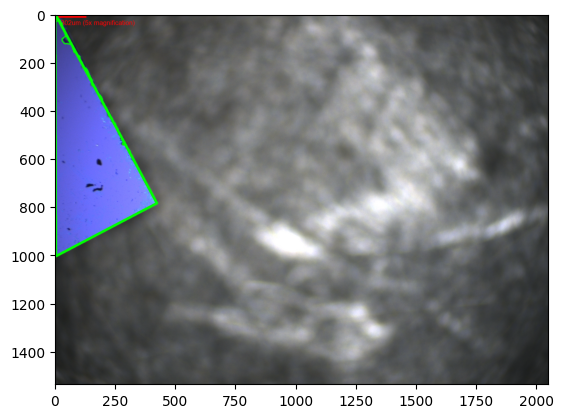

In [5]:
# Convert to YCrCb Channel and extract cb channel
img = cv2.imread('testImageFile.png', cv2.IMREAD_COLOR)
imgYCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)
channel = imgYCrCb[:,:,2]

ret, threshold = cv2.threshold(channel, 160,  255, cv2.THRESH_BINARY)


result = img.copy()
contours, hierarchy = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# contours = contours[0] if len(contours) == 2 else contours[1]
resImg = cv2.drawContours(result, contours, -1, (0, 255, 0), 3) 

for cont in contours:
    maxX = cont[0][0]
    maxY = cont[0][0]
    minX = cont[0][0]
    minY = cont[0][0]
    for point in cont:
        pt = point[0]
        if pt[0] > maxX[0]:
            maxX = pt
        elif pt[0] == maxX[0]:
            maxX = [pt[0], max(pt[1], maxX[1])]

        if pt[0] < minX[0]:
            minX = pt
        elif pt[0] == minX[0]:
            minX = [pt[0], min(pt[1], minX[1])]

        if pt[1] > maxY[1]:
            maxY = pt
        elif pt[1] == maxY[1]:
            maxY = [max(pt[0], maxY[0]), pt[1]]

        if pt[1] < minY[1]:
            minY = pt
        elif pt[1] == minY[1]:
            minY = [min(pt[0], maxY[0]), pt[1]]
    cv2.line(result, minX, minY, [0,255,0], 10)
    cv2.line(result, minY, maxX, [0,255,0], 10)
    cv2.line(result, maxX, maxY, [0,255,0], 10)
    cv2.line(result, maxY, minX, [0,255,0], 10)
    # print(f"{minX}, {minY}, {maxX}, {maxY}")

plt.imshow(cv2.cvtColor(resImg, cv2.COLOR_BGR2RGB))
# cv2.imwrite('testFileOut.png', cv2.cvtColor(channel, cv2.COLOR_BGR2RGB))

In [11]:
# Imports for flake testing
def visualise_flakes(
    flakes,
    image: np.ndarray,
    confidence_threshold: float = 0.5,
) -> np.ndarray:
    """Visualise the flakes on the image.

    Args:
        flakes (List[Flake]): List of flakes to visualise.
        image (np.ndarray): Image to visualise the flakes on.
        confidence_threshold (float, optional): The confidence threshold to use, flakes with less confidence are not drawn. Defaults to 0.5.

    Returns:
        np.ndarray: Image with the flakes visualised.
    """

    confident_flakes = [
        flake
        for flake in flakes
        if (1 - flake.false_positive_probability) > confidence_threshold
    ]

    # get a colors for each flake
    colors = cm.rainbow(np.linspace(0, 1, len(confident_flakes)))[:, :3] * 255

    image = image.copy()
    for idx, flake in enumerate(confident_flakes):
        flake_contour = cv2.morphologyEx(
            flake.mask, cv2.MORPH_GRADIENT, np.ones((3, 3), np.uint8)
        )
        image[flake_contour > 0] = colors[idx]

        # put the text on the top right corner of the image
        cv2.putText(
            image,
            f"{(idx + 1):2}. {flake.thickness:1}L {int(flake.size * 0.3844**2):4}um2 {1- flake.false_positive_probability:.0%}",
            (10, 30 * (idx + 1)),
            cv2.QT_FONT_NORMAL,
            1,
            (255, 255, 255),
            2,
        )

        # draw a line from the text to the center of the flake
        cv2.line(
            image,
            (370, 30 * (idx + 1) - 15),
            (int(flake.center[0]), int(flake.center[1])),
            colors[idx],
            2,
        )

    return image


def remove_vignette(
    image,
    flatfield,
    max_background_value: int = 241,
):
    """Removes the Vignette from the Image

    Args:
        image (NxMx3 Array): The Image with the Vignette
        flatfield (NxMx3 Array): the Flat Field in RGB
        max_background_value (int): the maximum value of the background

    Returns:
        (NxMx3 Array): The Image without the Vignette
    """
    image_no_vigentte = image / flatfield * cv2.mean(flatfield)[:-1]
    image_no_vigentte[image_no_vigentte > max_background_value] = max_background_value
    return np.asarray(image_no_vigentte, dtype=np.uint8)

def arg_parse() -> dict:
    """
    Parse arguments to the detect module

    Returns:
        dict: Dictionary of arguments
    """
    # fmt: off
    parser = argparse.ArgumentParser(description="2DMatGMM Demo")
    parser.add_argument("--out", dest="out", help="Output directory", default="output", type=str)
    parser.add_argument("--num_image", dest="num_image", help="Number of images to process", default=10, type=int)
    parser.add_argument("--material", dest="material", help="Material to process", default="Graphene", type=str)
    parser.add_argument("--size", dest="size", help="Size threshold in pixels", default=200, type=int)
    parser.add_argument("--std", dest="std", help="Standard deviation threshold", default=5, type=float)
    parser.add_argument("--min_confidence", dest="min_confidence", help="The Confidence threshold", default=0, type=float)
    parser.add_argument("--channels", dest="channels", help="Channels to use", default="BGR", type=str)
    parser.add_argument("--shuffel", dest="shuffel", default=False, type=bool)
    # fmt: on
    return vars(parser.parse_args())



In [12]:
args = arg_parse()


usage: ipykernel_launcher.py [-h] [--out OUT] [--num_image NUM_IMAGE]
                             [--material MATERIAL] [--size SIZE] [--std STD]
                             [--min_confidence MIN_CONFIDENCE]
                             [--channels CHANNELS] [--shuffel SHUFFEL]
ipykernel_launcher.py: error: unrecognized arguments: --f=c:\Users\wu_pe\AppData\Roaming\jupyter\runtime\kernel-v2-35184okx7nBpIRu5S.json


SystemExit: 2

c:\Users\wu_pe\miniconda3\envs\automatedTransfer\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [13]:
from GMMDetector import demo_functions

ImportError: cannot import name 'demo_functions' from 'GMMDetector' (c:\dev\2dmatgmm\GMMDetector\__init__.py)

In [14]:
contrast_dict = json.load(open("../contrastDictDir/Graphene_GMM.json", "r"))